In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
Train_data = pd.read_csv('train_Int_MM_PCA15.csv')
Validation_data = pd.read_csv('valid_Int_MM_PCA15.csv')
Test_data = pd.read_csv('test_Int_MM_PCA15.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PC1           12000 non-null  float64
 1   PC2           12000 non-null  float64
 2   PC3           12000 non-null  float64
 3   PC4           12000 non-null  float64
 4   PC5           12000 non-null  float64
 5   PC6           12000 non-null  float64
 6   PC7           12000 non-null  float64
 7   PC8           12000 non-null  float64
 8   PC9           12000 non-null  float64
 9   PC10          12000 non-null  float64
 10  PC11          12000 non-null  float64
 11  PC12          12000 non-null  float64
 12  PC13          12000 non-null  float64
 13  PC14          12000 non-null  float64
 14  PC15          12000 non-null  float64
 15  LoanApproved  12000 non-null  int64  
 16  RiskScore     12000 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 1.6 MB


In [3]:
Train_data.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.412651  0.084086  0.282528 -0.393400 -0.096727  0.393623 -0.103533   
1 -0.177765  0.031687  0.220899  0.010585 -0.042097 -0.534274  0.271388   
2  0.075380 -0.140120 -0.233582  0.085041 -0.253663 -0.209136 -0.191891   
3  0.598926 -0.203006  0.054247 -0.085631  0.062238  0.238745 -0.549751   
4  0.089788 -0.029256  0.082212 -0.036527 -0.274680 -0.538655 -0.136887   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.098367 -0.313214 -0.013962 -0.074108 -0.287169  0.161454  0.360753   
1  0.394490 -0.065320  0.194361 -0.043839 -0.142310  0.154376 -0.110080   
2  0.494238 -0.013998 -0.162744 -0.048602  0.308490 -0.148155 -0.075608   
3 -0.151796  0.010523  0.218145 -0.083986 -0.005491 -0.102736 -0.411824   
4 -0.148626  0.186360 -0.124184 -0.057235  0.116438 -0.106489  0.006368   

       PC15  LoanApproved  RiskScore  
0  0.129990             0   0.402174  
1  0.119097             0   0.384058  
2  0.089184             0   0.438406  
3 -0.049605             1   0.086957  
4  0.109196             0   0.438406

In [4]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = Train_data.drop('RisKScore',axis=1)
y_training = Train_data['LoanApproved']

In [5]:
y_training.min()

0

In [6]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = Validation_data.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [7]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = Test_data.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [8]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [9]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [10]:
print(y_training)

[0 0 0 ... 1 0 0]


In [11]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [12]:
print(X_training.shape)

(12000, 16)


Training Losses are 
          0
0  0.664993
1  0.663413
2  0.661857
3  0.660323
4  0.658812
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


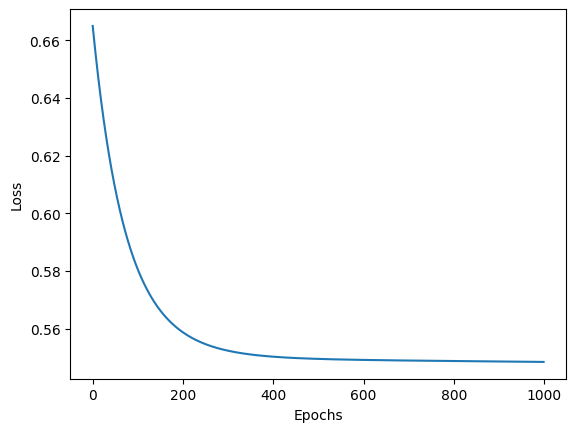

Training Losses are 
          0
0  0.770605
1  0.765650
2  0.760809
3  0.756080
4  0.751461
Validation Data
Confusion Matrix for hidden layer 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


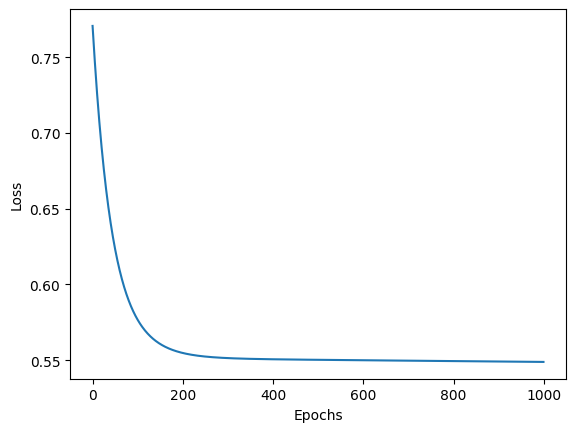

Training Losses are 
          0
0  0.725178
1  0.717622
2  0.710403
3  0.703506
4  0.696919
Validation Data
Confusion Matrix for hidden layer 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


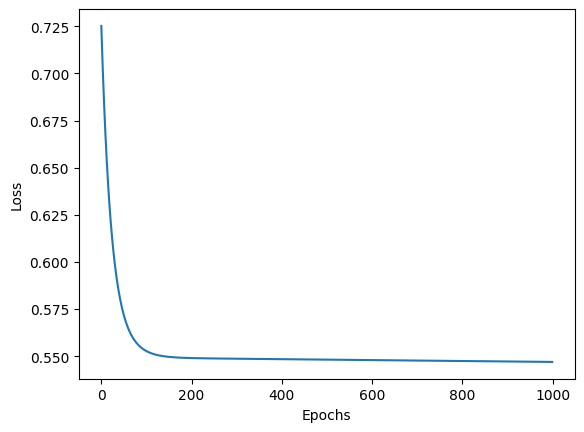

Training Losses are 
          0
0  0.708559
1  0.695708
2  0.683943
3  0.673172
4  0.663310
Validation Data
Confusion Matrix for hidden layer 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


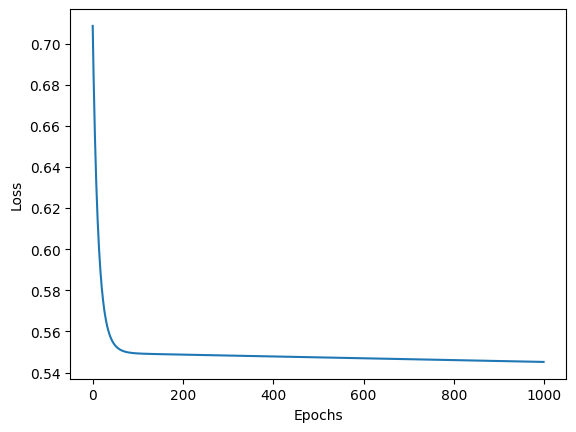

Training Losses are 
          0
0  0.651210
1  0.636122
2  0.623428
3  0.612731
4  0.603699
Validation Data
Confusion Matrix for hidden layer 128
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 128
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


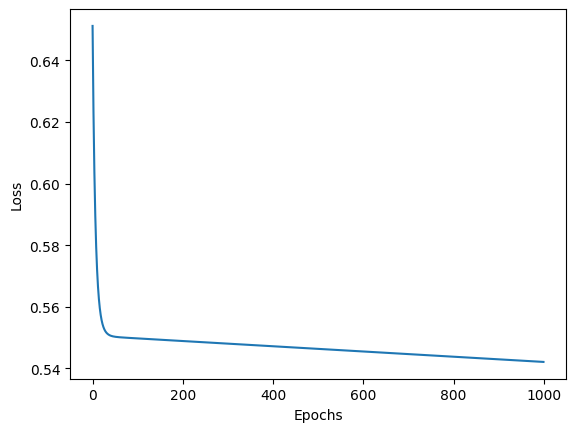

Best accuracy for test data is 0.761 for degree 8


In [13]:
nuerons = [8,16,32,64,128]
min_loss = 0
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(16,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.SGD(model.parameters(), lr=0.01)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:}, Precision: {precision:}, Recall: {recall:}, F1-score: {f1:}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:}, Precision: {precision:}, Recall: {recall:}, F1-score: {f1:}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")

Training Losses are 
          0
0  0.694732
1  0.693237
2  0.691750
3  0.690271
4  0.688800
Validation Data
Confusion Matrix for hidden layer 8
[[3041    3]
 [ 906   50]]
Accuracy: 0.7728, Precision: 0.9434, Recall: 0.0523, F1-score: 0.0991

Test Data
Confusion Matrix for hiden layer 8
[[3040    4]
 [ 890   66]]
Accuracy: 0.7765, Precision: 0.9429, Recall: 0.0690, F1-score: 0.1287



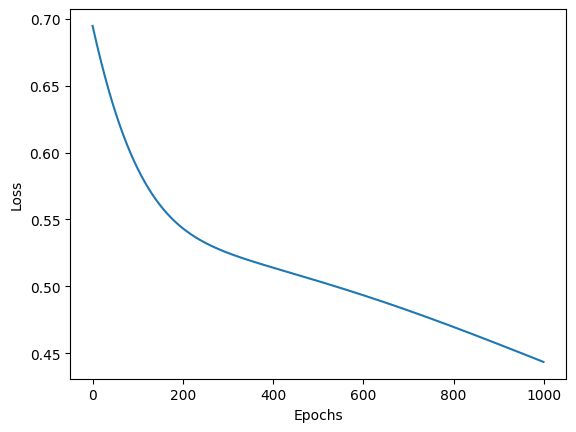

Training Losses are 
          0
0  0.843462
1  0.839676
2  0.835917
3  0.832185
4  0.828481
Validation Data
Confusion Matrix for hidden layer 16
[[3031   13]
 [ 837  119]]
Accuracy: 0.7875, Precision: 0.9015, Recall: 0.1245, F1-score: 0.2188

Test Data
Confusion Matrix for hiden layer 16
[[3029   15]
 [ 829  127]]
Accuracy: 0.7890, Precision: 0.8944, Recall: 0.1328, F1-score: 0.2313



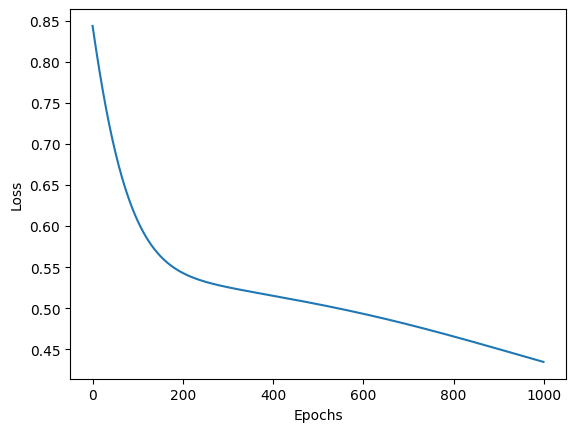

Training Losses are 
          0
0  0.698911
1  0.694053
2  0.689275
3  0.684579
4  0.679966
Validation Data
Confusion Matrix for hidden layer 32
[[2964   80]
 [ 472  484]]
Accuracy: 0.8620, Precision: 0.8582, Recall: 0.5063, F1-score: 0.6368

Test Data
Confusion Matrix for hiden layer 32
[[2963   81]
 [ 470  486]]
Accuracy: 0.8622, Precision: 0.8571, Recall: 0.5084, F1-score: 0.6382



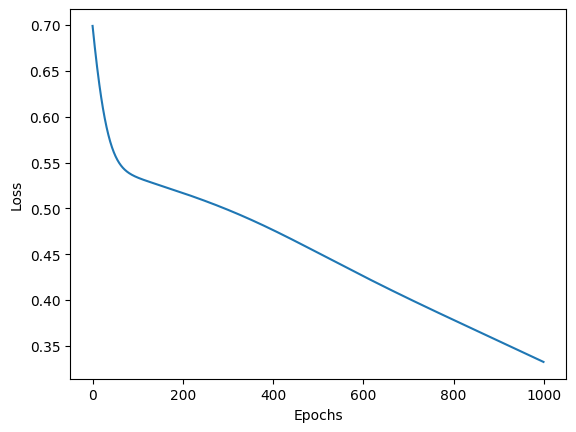

Training Losses are 
          0
0  0.649212
1  0.641550
2  0.634194
3  0.627149
4  0.620415
Validation Data
Confusion Matrix for hidden layer 64
[[2985   59]
 [ 268  688]]
Accuracy: 0.9183, Precision: 0.9210, Recall: 0.7197, F1-score: 0.8080

Test Data
Confusion Matrix for hiden layer 64
[[2981   63]
 [ 252  704]]
Accuracy: 0.9213, Precision: 0.9179, Recall: 0.7364, F1-score: 0.8172



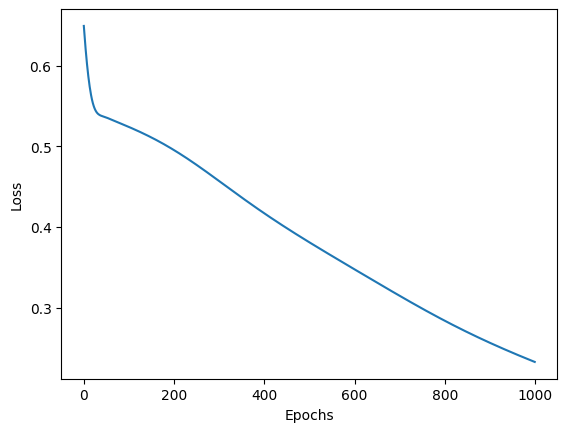

Training Losses are 
          0
0  0.701649
1  0.683794
2  0.667103
3  0.651592
4  0.637267
Validation Data
Confusion Matrix for hidden layer 128
[[2993   51]
 [ 192  764]]
Accuracy: 0.9393, Precision: 0.9374, Recall: 0.7992, F1-score: 0.8628

Test Data
Confusion Matrix for hiden layer 128
[[2994   50]
 [ 179  777]]
Accuracy: 0.9427, Precision: 0.9395, Recall: 0.8128, F1-score: 0.8716



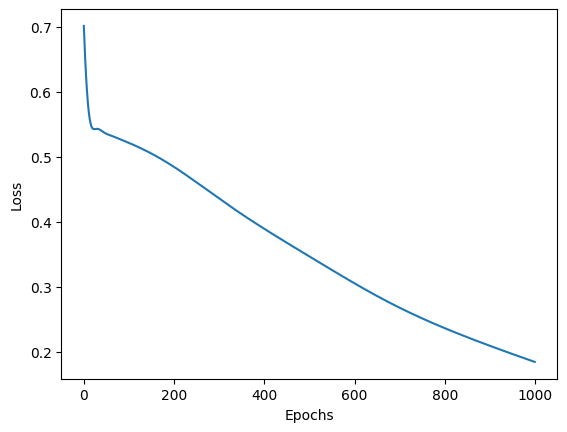

Best accuracy for test data is 0.94275 for degree 128


In [14]:
nuerons = [8,16,32,64,128]
min_loss_2 = 0
best_degree_2 = 1000
for nueron in nuerons:
  model = SingleLayer(16,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss_2:
    min_loss_2 = acc
    best_degree_2 = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss_2} for degree {best_degree_2}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [15]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.803982
1  0.799860
2  0.795806
3  0.791820
4  0.787899
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


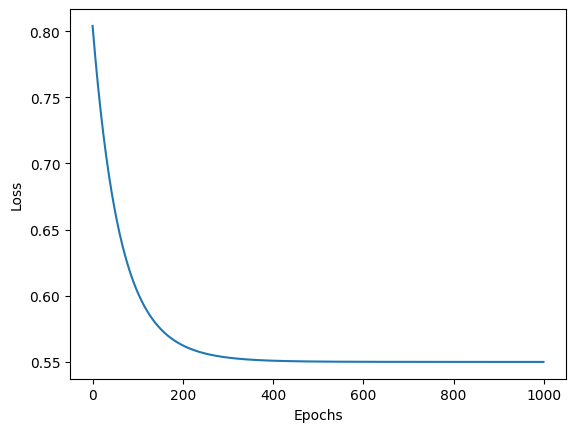

Training Losses are 
          0
0  0.677941
1  0.675164
2  0.672450
3  0.669799
4  0.667209
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


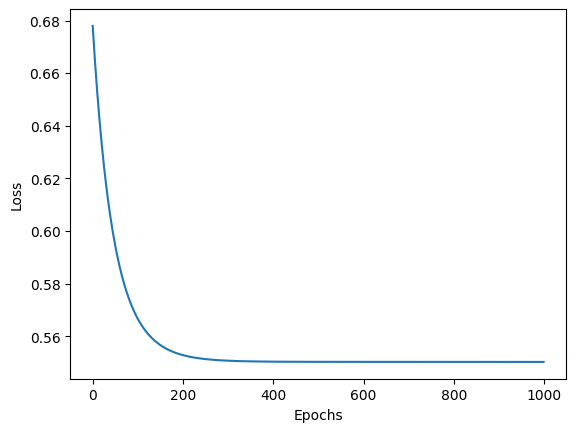

Training Losses are 
          0
0  0.608169
1  0.605585
2  0.603124
3  0.600781
4  0.598549
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


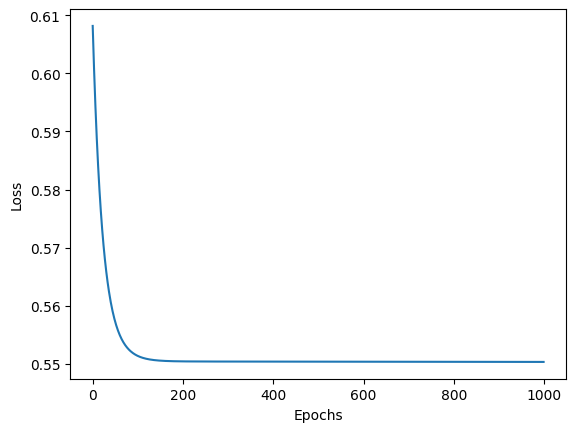

Training Losses are 
          0
0  0.745513
1  0.729036
2  0.713992
3  0.700259
4  0.687726
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


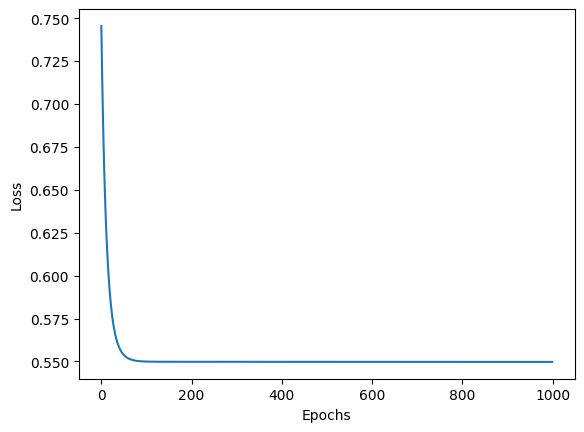

Training Losses are 
          0
0  0.778647
1  0.774868
2  0.771153
3  0.767501
4  0.763911
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


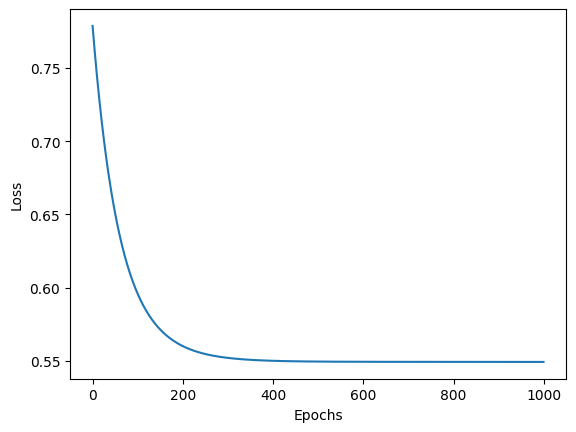

Training Losses are 
          0
0  0.606658
1  0.605346
2  0.604067
3  0.602819
4  0.601601
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


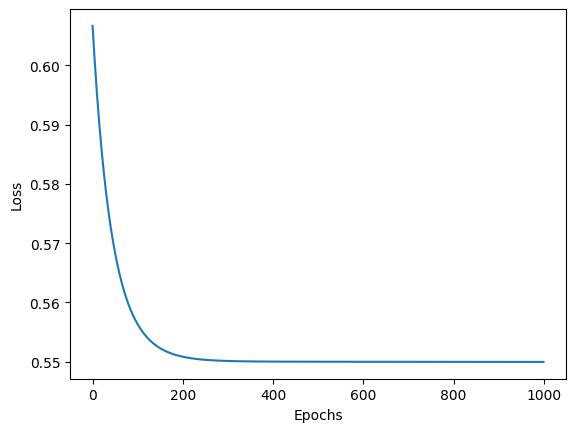

Training Losses are 
          0
0  0.700913
1  0.693890
2  0.687209
3  0.680853
4  0.674808
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


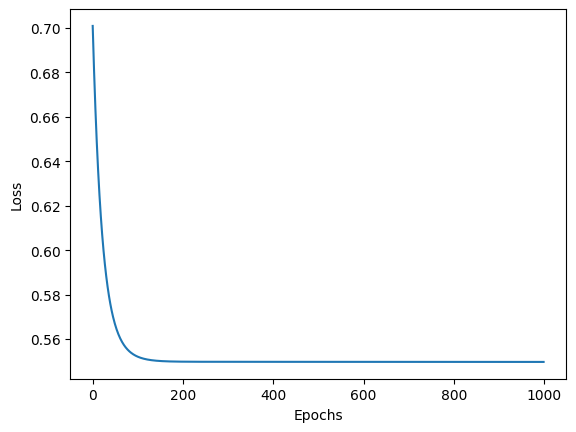

Training Losses are 
          0
0  0.662874
1  0.654096
2  0.646039
3  0.638643
4  0.631851
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


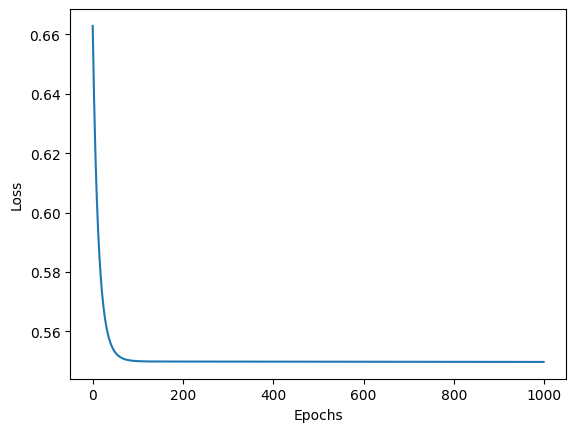

Training Losses are 
          0
0  0.577072
1  0.576667
2  0.576267
3  0.575874
4  0.575486
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


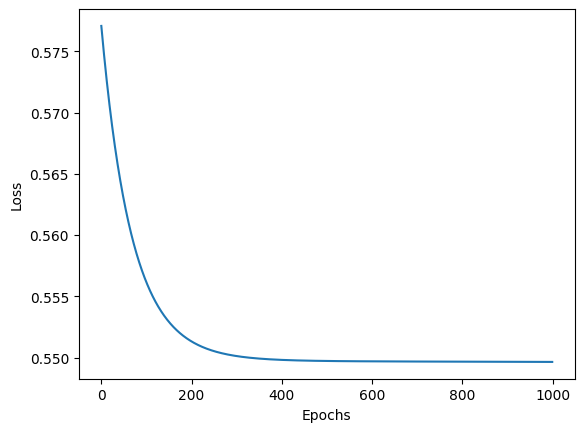

Training Losses are 
          0
0  0.630742
1  0.628835
2  0.626976
3  0.625163
4  0.623395
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


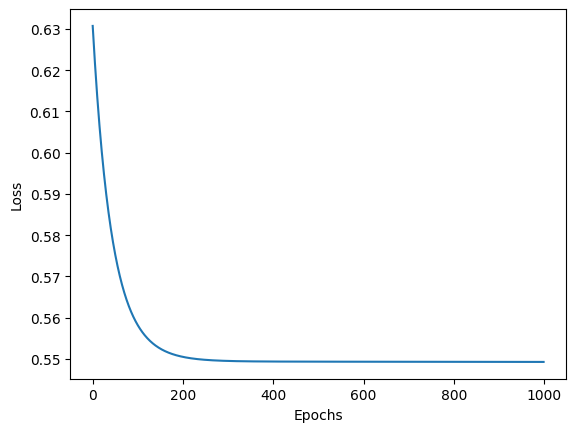

Training Losses are 
          0
0  0.812478
1  0.801515
2  0.791014
3  0.780956
4  0.771325
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


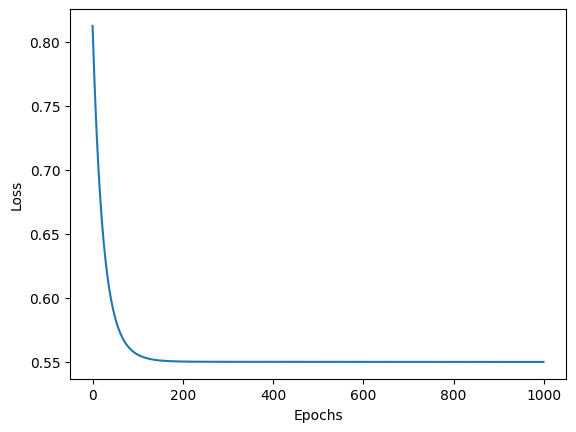

Training Losses are 
          0
0  0.825438
1  0.802299
2  0.781103
3  0.761705
4  0.743965
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


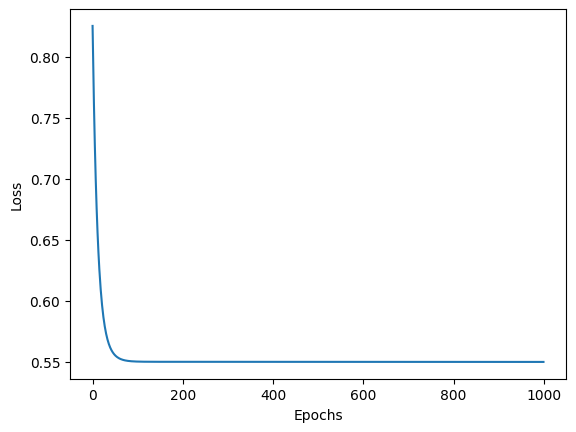

Training Losses are 
          0
0  0.627427
1  0.626222
2  0.625037
3  0.623870
4  0.622722
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


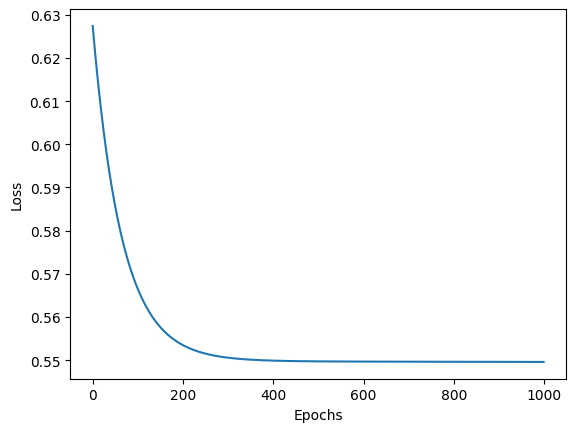

Training Losses are 
          0
0  0.735974
1  0.731380
2  0.726904
3  0.722545
4  0.718298
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


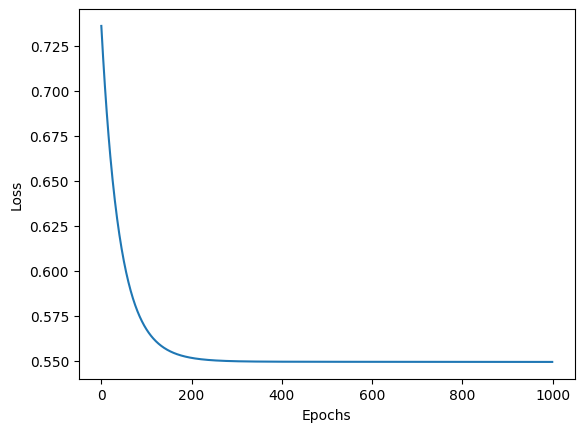

Training Losses are 
          0
0  0.707526
1  0.700631
2  0.694052
3  0.687773
4  0.681782
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


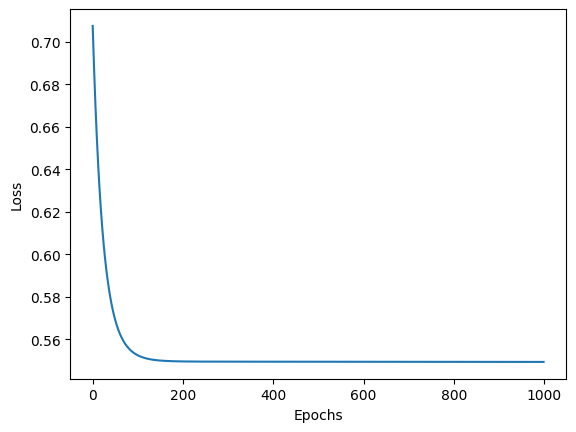

Training Losses are 
          0
0  0.920558
1  0.888582
2  0.859252
3  0.832394
4  0.807838
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


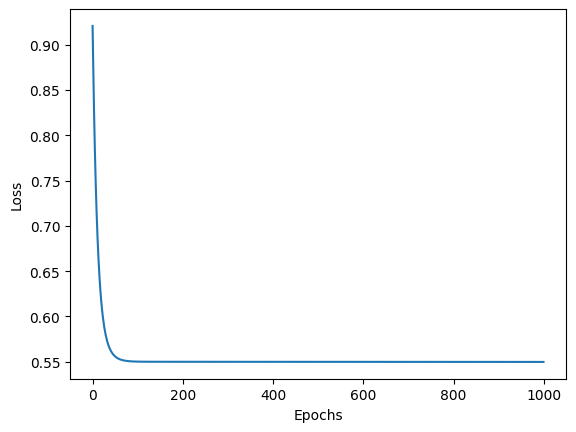

Best accuracy for test data is 0.761 for degree 8 & 8


In [16]:
nuerons = [8,16,32,64]
best_accuracy_1=0
best_degree_3=0
layer_xyz=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(16,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_1:
        best_accuracy_1=acc
        best_degree_3=nueron
        layer_xyz=double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_1} for degree {best_degree_3} & {layer_xyz}")

Training Losses are 
          0
0  0.701093
1  0.699433
2  0.697781
3  0.696138
4  0.694503
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


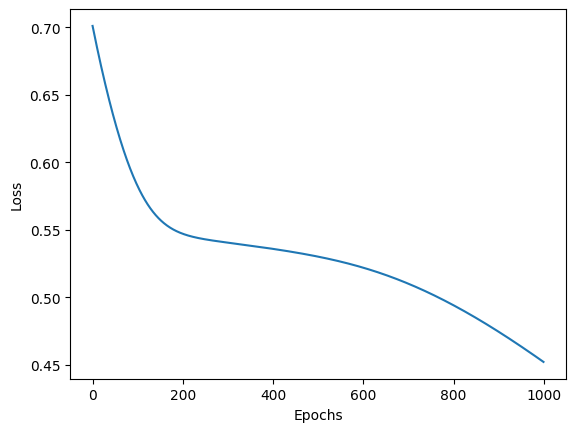

Training Losses are 
          0
0  0.600066
1  0.598379
2  0.596723
3  0.595097
4  0.593502
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[2985   59]
 [ 309  647]]
Accuracy: 0.9080, Precision: 0.9164, Recall: 0.6768, F1-score: 0.7786

Test Data
Confusion Matrix for hiden layer 8 and 16
[[2984   60]
 [ 314  642]]
Accuracy: 0.9065, Precision: 0.9145, Recall: 0.6715, F1-score: 0.7744



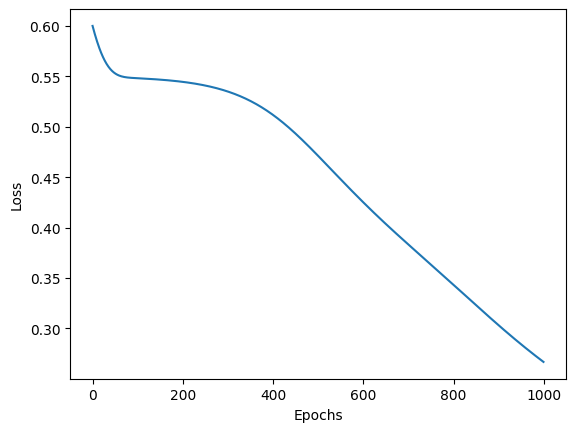

Training Losses are 
          0
0  0.783235
1  0.776595
2  0.770065
3  0.763645
4  0.757338
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[2949   95]
 [ 450  506]]
Accuracy: 0.8638, Precision: 0.8419, Recall: 0.5293, F1-score: 0.6500

Test Data
Confusion Matrix for hiden layer 8 and 32
[[2939  105]
 [ 465  491]]
Accuracy: 0.8575, Precision: 0.8238, Recall: 0.5136, F1-score: 0.6327



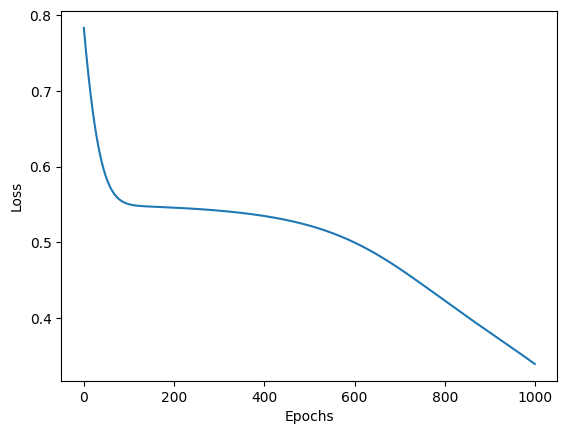

Training Losses are 
          0
0  0.800844
1  0.788045
2  0.775601
3  0.763520
4  0.751808
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2947   97]
 [ 393  563]]
Accuracy: 0.8775, Precision: 0.8530, Recall: 0.5889, F1-score: 0.6968

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2943  101]
 [ 384  572]]
Accuracy: 0.8788, Precision: 0.8499, Recall: 0.5983, F1-score: 0.7023



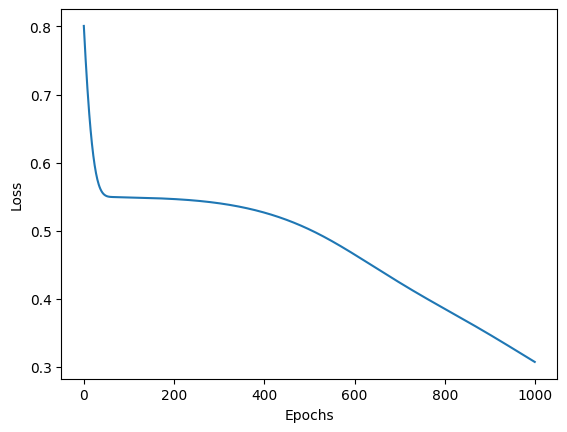

Training Losses are 
          0
0  0.703725
1  0.701288
2  0.698869
3  0.696469
4  0.694086
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3044    0]
 [ 953    3]]
Accuracy: 0.7618, Precision: 1.0000, Recall: 0.0031, F1-score: 0.0063

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [ 948    8]]
Accuracy: 0.7630, Precision: 1.0000, Recall: 0.0084, F1-score: 0.0166



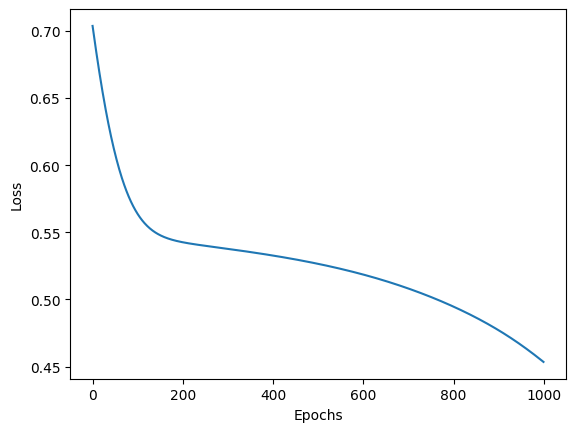

Training Losses are 
          0
0  0.800295
1  0.795150
2  0.790066
3  0.785044
4  0.780085
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3029   15]
 [ 822  134]]
Accuracy: 0.7907, Precision: 0.8993, Recall: 0.1402, F1-score: 0.2425

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3027   17]
 [ 813  143]]
Accuracy: 0.7925, Precision: 0.8938, Recall: 0.1496, F1-score: 0.2563



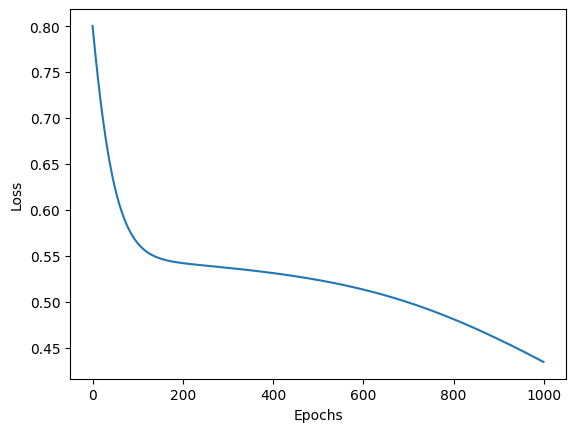

Training Losses are 
          0
0  0.644802
1  0.640007
2  0.635345
3  0.630817
4  0.626426
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2981   63]
 [ 197  759]]
Accuracy: 0.9350, Precision: 0.9234, Recall: 0.7939, F1-score: 0.8538

Test Data
Confusion Matrix for hiden layer 16 and 32
[[2974   70]
 [ 191  765]]
Accuracy: 0.9347, Precision: 0.9162, Recall: 0.8002, F1-score: 0.8543



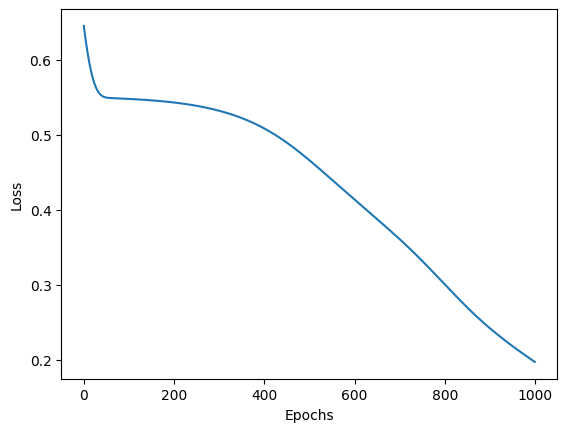

Training Losses are 
          0
0  0.649348
1  0.640768
2  0.632609
3  0.624875
4  0.617570
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3003   41]
 [  75  881]]
Accuracy: 0.9710, Precision: 0.9555, Recall: 0.9215, F1-score: 0.9382

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3008   36]
 [  77  879]]
Accuracy: 0.9718, Precision: 0.9607, Recall: 0.9195, F1-score: 0.9396



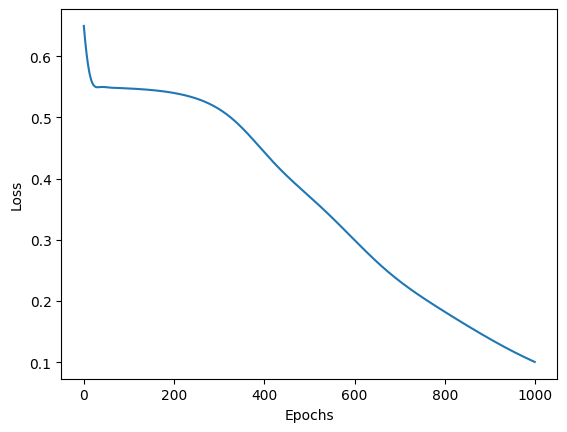

Training Losses are 
          0
0  0.854924
1  0.850811
2  0.846731
3  0.842683
4  0.838669
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3004   40]
 [ 704  252]]
Accuracy: 0.8140, Precision: 0.8630, Recall: 0.2636, F1-score: 0.4038

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3001   43]
 [ 704  252]]
Accuracy: 0.8133, Precision: 0.8542, Recall: 0.2636, F1-score: 0.4029



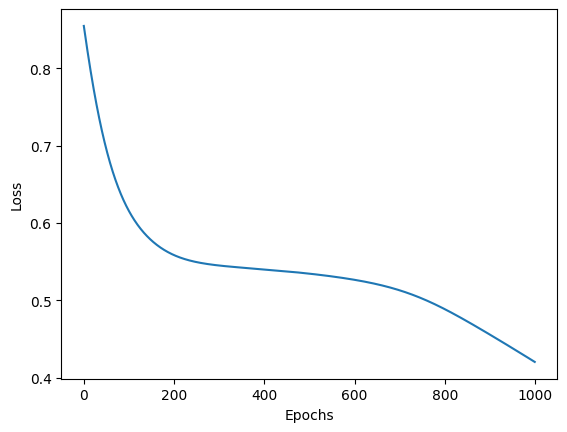

Training Losses are 
          0
0  0.656636
1  0.652729
2  0.648905
3  0.645165
4  0.641510
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[2983   61]
 [ 173  783]]
Accuracy: 0.9415, Precision: 0.9277, Recall: 0.8190, F1-score: 0.8700

Test Data
Confusion Matrix for hiden layer 32 and 16
[[2981   63]
 [ 166  790]]
Accuracy: 0.9427, Precision: 0.9261, Recall: 0.8264, F1-score: 0.8734



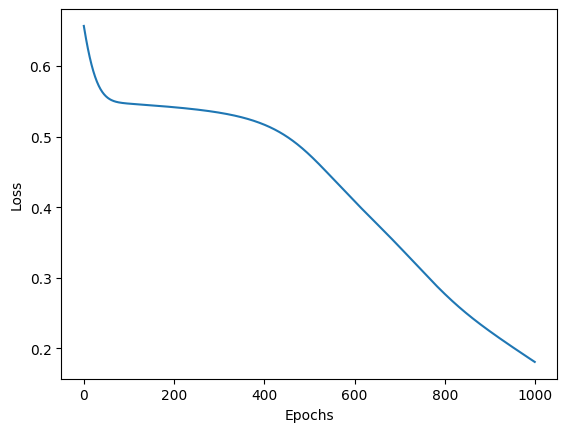

Training Losses are 
          0
0  0.617291
1  0.612568
2  0.608030
3  0.603680
4  0.599516
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3017   27]
 [  36  920]]
Accuracy: 0.9842, Precision: 0.9715, Recall: 0.9623, F1-score: 0.9669

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3019   25]
 [  45  911]]
Accuracy: 0.9825, Precision: 0.9733, Recall: 0.9529, F1-score: 0.9630



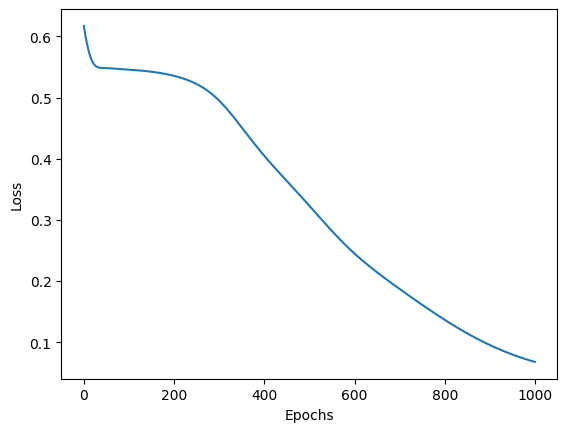

Training Losses are 
          0
0  0.577617
1  0.572613
2  0.568134
3  0.564184
4  0.560758
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3021   23]
 [  11  945]]
Accuracy: 0.9915, Precision: 0.9762, Recall: 0.9885, F1-score: 0.9823

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3027   17]
 [  10  946]]
Accuracy: 0.9932, Precision: 0.9823, Recall: 0.9895, F1-score: 0.9859



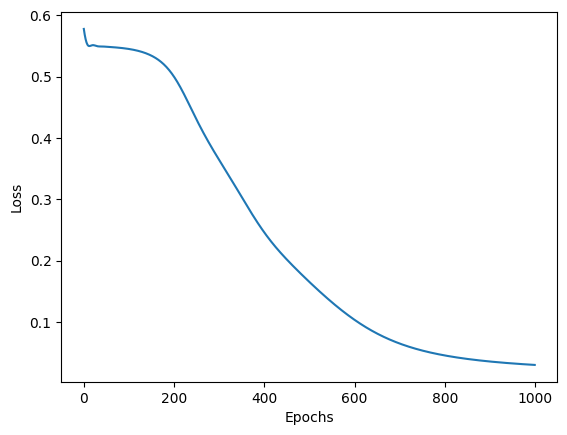

Training Losses are 
          0
0  0.765334
1  0.759934
2  0.754617
3  0.749388
4  0.744248
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2988   56]
 [ 286  670]]
Accuracy: 0.9145, Precision: 0.9229, Recall: 0.7008, F1-score: 0.7967

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2986   58]
 [ 279  677]]
Accuracy: 0.9157, Precision: 0.9211, Recall: 0.7082, F1-score: 0.8007



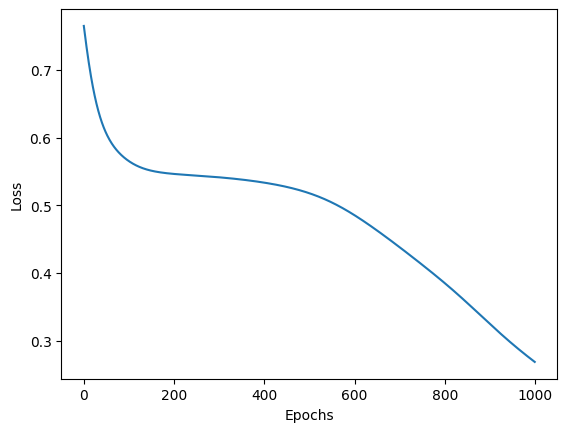

Training Losses are 
          0
0  0.761685
1  0.753430
2  0.745368
3  0.737504
4  0.729844
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2988   56]
 [ 169  787]]
Accuracy: 0.9437, Precision: 0.9336, Recall: 0.8232, F1-score: 0.8749

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2988   56]
 [ 163  793]]
Accuracy: 0.9453, Precision: 0.9340, Recall: 0.8295, F1-score: 0.8787



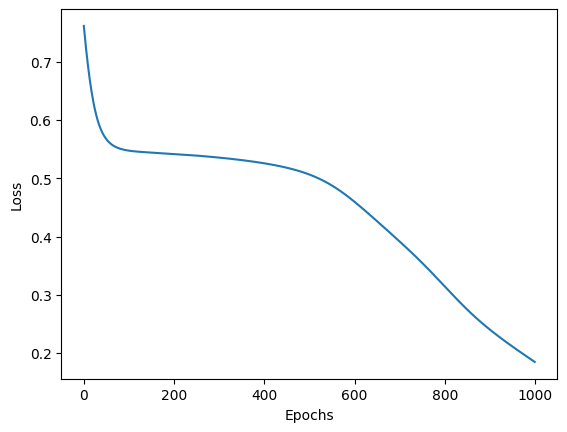

Training Losses are 
          0
0  0.627230
1  0.619884
2  0.612938
3  0.606396
4  0.600262
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3020   24]
 [  15  941]]
Accuracy: 0.9902, Precision: 0.9751, Recall: 0.9843, F1-score: 0.9797

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3026   18]
 [  14  942]]
Accuracy: 0.9920, Precision: 0.9812, Recall: 0.9854, F1-score: 0.9833



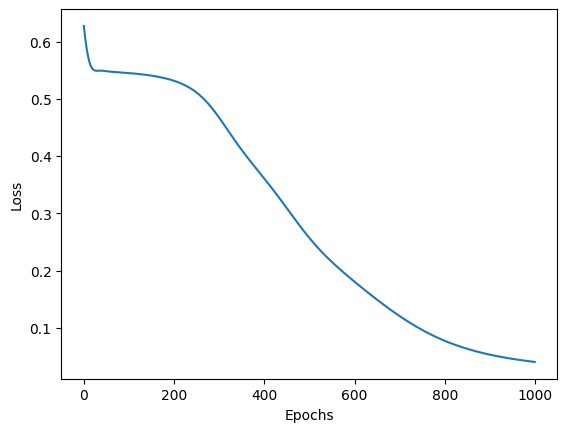

Training Losses are 
          0
0  0.644218
1  0.631900
2  0.620528
3  0.610106
4  0.600631
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3022   22]
 [  10  946]]
Accuracy: 0.9920, Precision: 0.9773, Recall: 0.9895, F1-score: 0.9834

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3027   17]
 [  11  945]]
Accuracy: 0.9930, Precision: 0.9823, Recall: 0.9885, F1-score: 0.9854



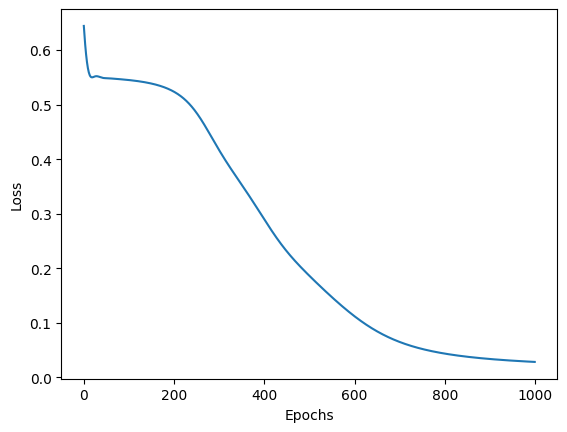

Best accuracy for test data is 0.99325 for degree 32 & 64


In [17]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0
layer_abc=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(16,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
          layer_abc = double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4} & {layer_abc}")

In [18]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.674659
1  0.673071
2  0.671492
3  0.669921
4  0.668359
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3040    4]
 [ 897   59]]
Accuracy: 0.7748, Precision: 0.9365, Recall: 0.0617, F1-score: 0.1158

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3040    4]
 [ 887   69]]
Accuracy: 0.7772, Precision: 0.9452, Recall: 0.0722, F1-score: 0.1341



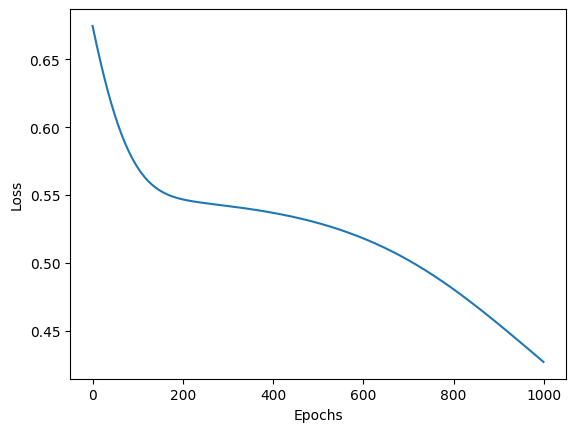

Training Losses are 
          0
0  0.606646
1  0.605611
2  0.604585
3  0.603569
4  0.602563
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[2964   80]
 [ 521  435]]
Accuracy: 0.8498, Precision: 0.8447, Recall: 0.4550, F1-score: 0.5914

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[2965   79]
 [ 516  440]]
Accuracy: 0.8512, Precision: 0.8478, Recall: 0.4603, F1-score: 0.5966



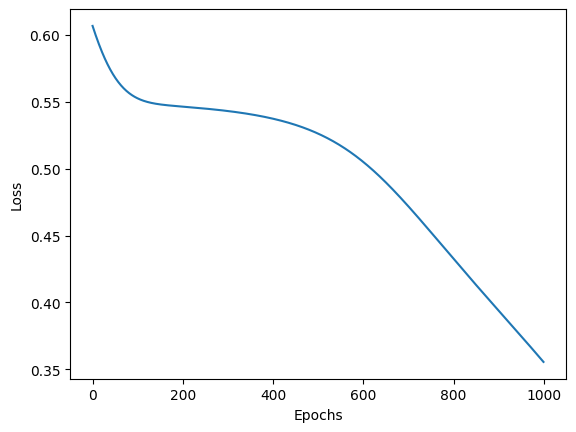

Training Losses are 
          0
0  0.732412
1  0.730508
2  0.728616
3  0.726736
4  0.724868
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


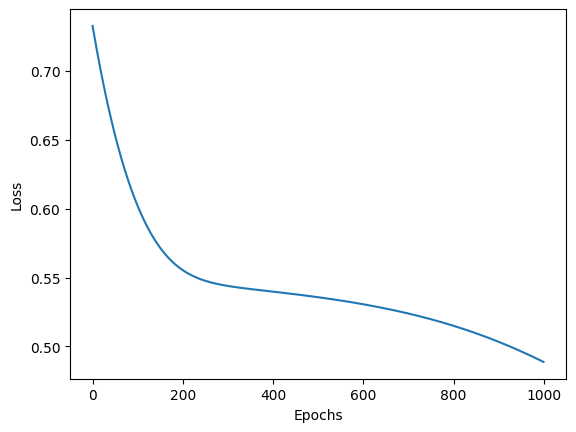

Training Losses are 
          0
0  0.846874
1  0.844296
2  0.841732
3  0.839180
4  0.836643
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


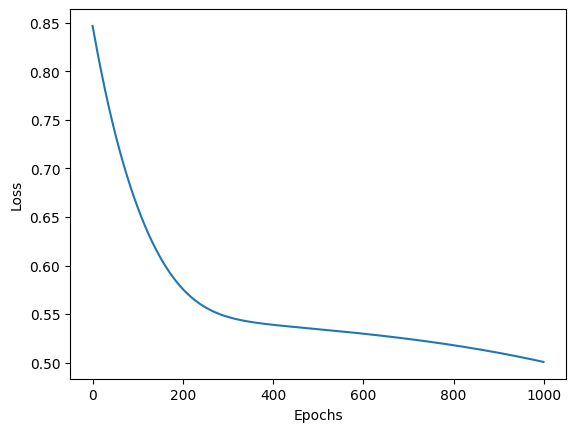

Training Losses are 
          0
0  0.614604
1  0.612678
2  0.610783
3  0.608920
4  0.607089
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[2961   83]
 [ 345  611]]
Accuracy: 0.8930, Precision: 0.8804, Recall: 0.6391, F1-score: 0.7406

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[2954   90]
 [ 330  626]]
Accuracy: 0.8950, Precision: 0.8743, Recall: 0.6548, F1-score: 0.7488



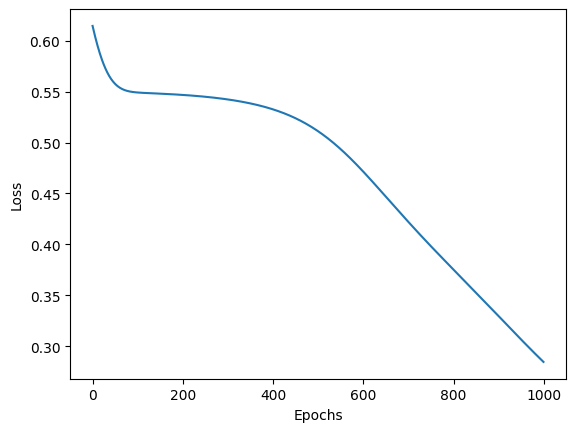

Training Losses are 
          0
0  0.770265
1  0.766591
2  0.762953
3  0.759349
4  0.755781
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


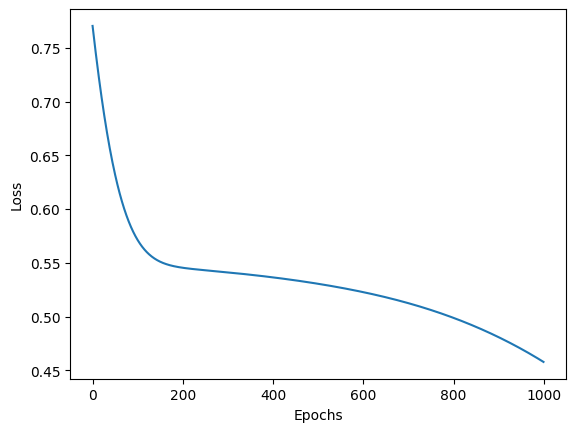

Training Losses are 
          0
0  0.872352
1  0.868129
2  0.863938
3  0.859779
4  0.855652
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


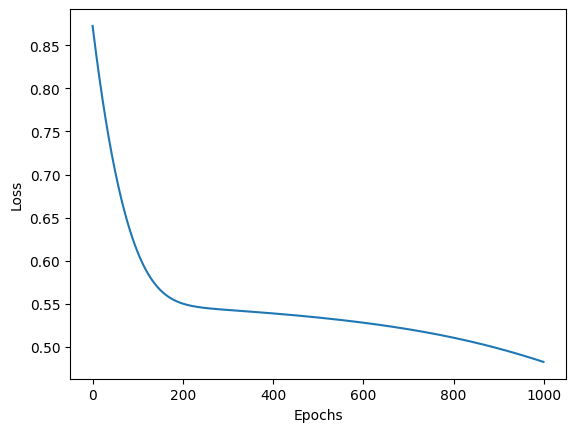

Training Losses are 
          0
0  0.782064
1  0.777994
2  0.773965
3  0.769976
4  0.766029
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[2977   67]
 [ 628  328]]
Accuracy: 0.8263, Precision: 0.8304, Recall: 0.3431, F1-score: 0.4856

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[2983   61]
 [ 635  321]]
Accuracy: 0.8260, Precision: 0.8403, Recall: 0.3358, F1-score: 0.4798



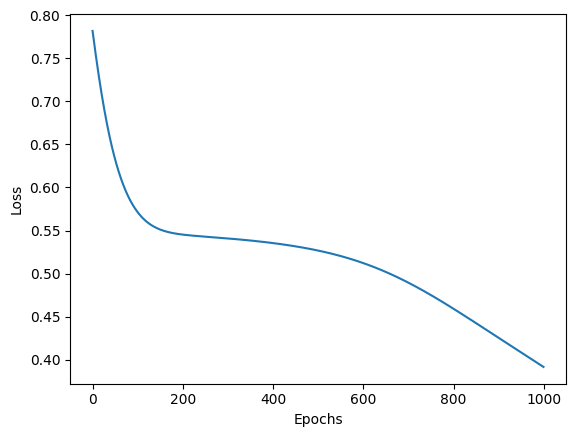

Training Losses are 
          0
0  0.741453
1  0.735421
2  0.729493
3  0.723672
4  0.717959
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[2947   97]
 [ 439  517]]
Accuracy: 0.8660, Precision: 0.8420, Recall: 0.5408, F1-score: 0.6586

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[2942  102]
 [ 444  512]]
Accuracy: 0.8635, Precision: 0.8339, Recall: 0.5356, F1-score: 0.6522



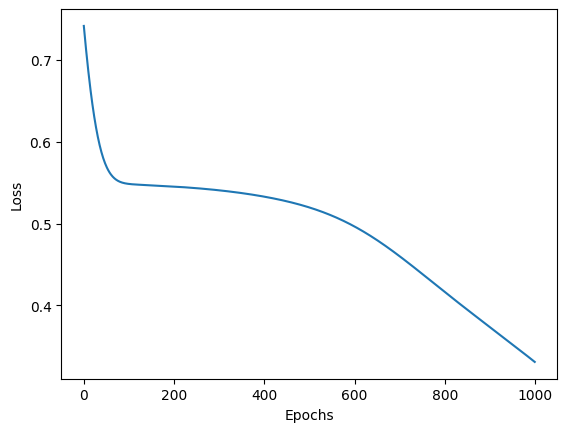

Training Losses are 
          0
0  0.704147
1  0.698712
2  0.693381
3  0.688154
4  0.683034
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2952   92]
 [ 346  610]]
Accuracy: 0.8905, Precision: 0.8689, Recall: 0.6381, F1-score: 0.7358

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2950   94]
 [ 335  621]]
Accuracy: 0.8928, Precision: 0.8685, Recall: 0.6496, F1-score: 0.7433



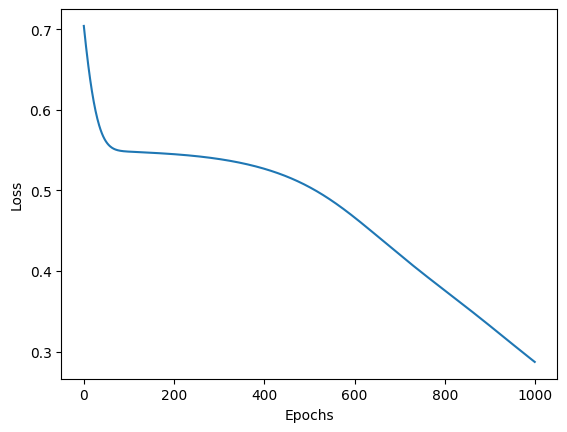

Training Losses are 
          0
0  0.684746
1  0.679347
2  0.674067
3  0.668908
4  0.663871
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[2959   85]
 [ 326  630]]
Accuracy: 0.8972, Precision: 0.8811, Recall: 0.6590, F1-score: 0.7540

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[2953   91]
 [ 313  643]]
Accuracy: 0.8990, Precision: 0.8760, Recall: 0.6726, F1-score: 0.7609



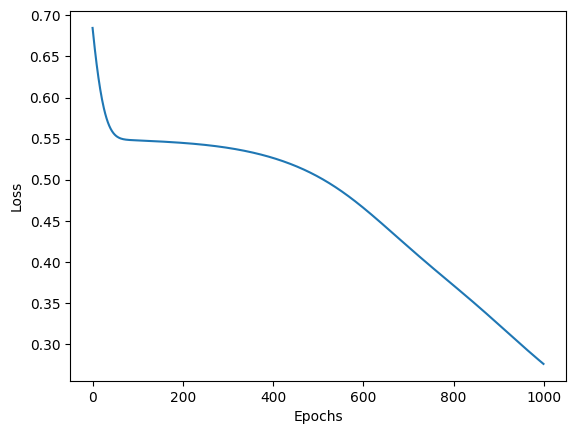

Training Losses are 
          0
0  0.575805
1  0.573668
2  0.571628
3  0.569686
4  0.567844
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[2998   46]
 [ 132  824]]
Accuracy: 0.9555, Precision: 0.9471, Recall: 0.8619, F1-score: 0.9025

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[2995   49]
 [ 127  829]]
Accuracy: 0.9560, Precision: 0.9442, Recall: 0.8672, F1-score: 0.9040



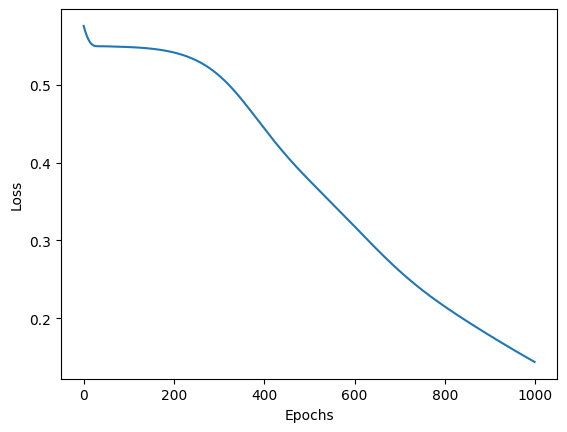

Training Losses are 
          0
0  0.629066
1  0.621909
2  0.615122
3  0.608707
4  0.602666
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2986   58]
 [ 158  798]]
Accuracy: 0.9460, Precision: 0.9322, Recall: 0.8347, F1-score: 0.8808

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2988   56]
 [ 150  806]]
Accuracy: 0.9485, Precision: 0.9350, Recall: 0.8431, F1-score: 0.8867



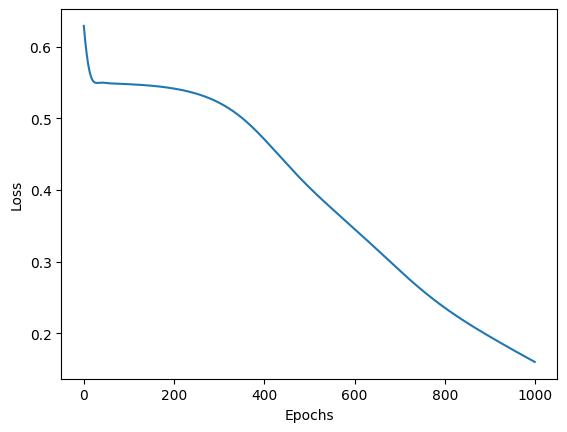

Training Losses are 
          0
0  0.813550
1  0.799987
2  0.786793
3  0.773975
4  0.761542
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2961   83]
 [ 307  649]]
Accuracy: 0.9025, Precision: 0.8866, Recall: 0.6789, F1-score: 0.7690

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2957   87]
 [ 300  656]]
Accuracy: 0.9032, Precision: 0.8829, Recall: 0.6862, F1-score: 0.7722



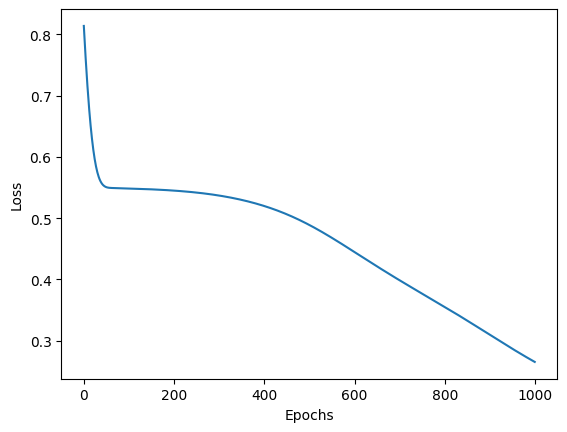

Training Losses are 
          0
0  0.650642
1  0.642133
2  0.634034
3  0.626350
4  0.619082
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2973   71]
 [ 229  727]]
Accuracy: 0.9250, Precision: 0.9110, Recall: 0.7605, F1-score: 0.8290

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2973   71]
 [ 222  734]]
Accuracy: 0.9267, Precision: 0.9118, Recall: 0.7678, F1-score: 0.8336



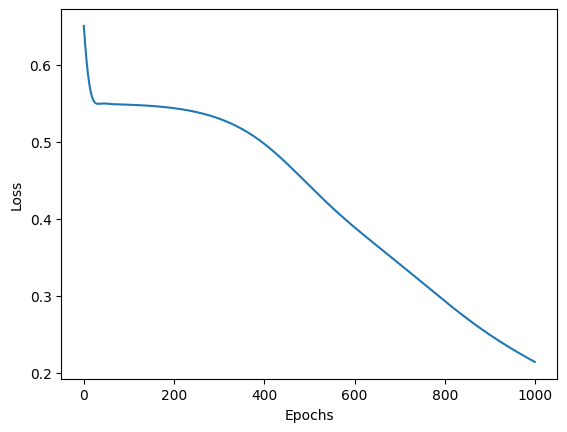

Training Losses are 
          0
0  0.574037
1  0.570348
2  0.566990
3  0.563965
4  0.561271
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3008   36]
 [  51  905]]
Accuracy: 0.9782, Precision: 0.9617, Recall: 0.9467, F1-score: 0.9541

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3014   30]
 [  60  896]]
Accuracy: 0.9775, Precision: 0.9676, Recall: 0.9372, F1-score: 0.9522



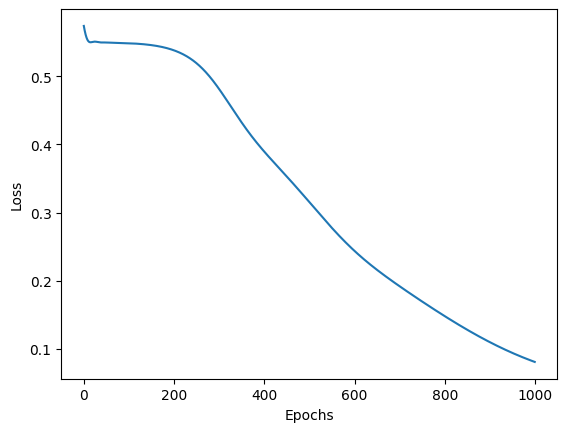

Training Losses are 
          0
0  0.691259
1  0.688912
2  0.686583
3  0.684273
4  0.681984
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[2971   73]
 [ 600  356]]
Accuracy: 0.8317, Precision: 0.8298, Recall: 0.3724, F1-score: 0.5141

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[2967   77]
 [ 610  346]]
Accuracy: 0.8283, Precision: 0.8180, Recall: 0.3619, F1-score: 0.5018



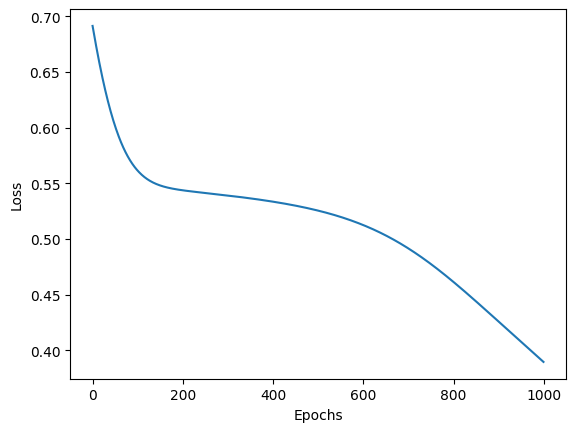

Training Losses are 
          0
0  0.633482
1  0.631814
2  0.630164
3  0.628533
4  0.626920
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[2961   83]
 [ 387  569]]
Accuracy: 0.8825, Precision: 0.8727, Recall: 0.5952, F1-score: 0.7077

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[2961   83]
 [ 383  573]]
Accuracy: 0.8835, Precision: 0.8735, Recall: 0.5994, F1-score: 0.7109



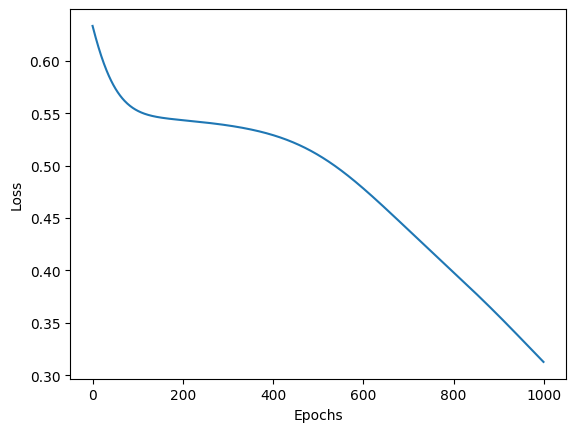

Training Losses are 
          0
0  0.621254
1  0.619621
2  0.618007
3  0.616411
4  0.614835
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[2959   85]
 [ 400  556]]
Accuracy: 0.8788, Precision: 0.8674, Recall: 0.5816, F1-score: 0.6963

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[2957   87]
 [ 388  568]]
Accuracy: 0.8812, Precision: 0.8672, Recall: 0.5941, F1-score: 0.7052



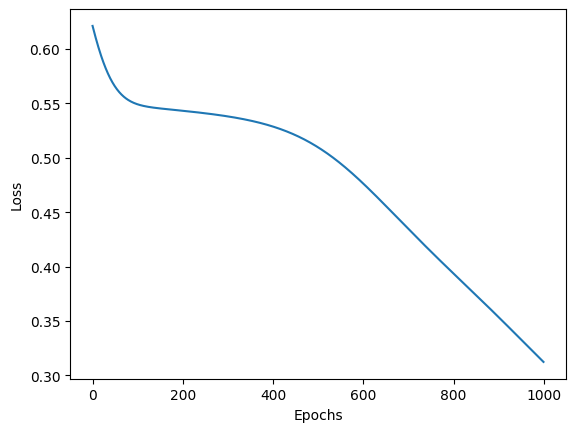

Training Losses are 
          0
0  0.656231
1  0.654433
2  0.652650
3  0.650881
4  0.649128
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[2963   81]
 [ 547  409]]
Accuracy: 0.8430, Precision: 0.8347, Recall: 0.4278, F1-score: 0.5657

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[2965   79]
 [ 540  416]]
Accuracy: 0.8452, Precision: 0.8404, Recall: 0.4351, F1-score: 0.5734



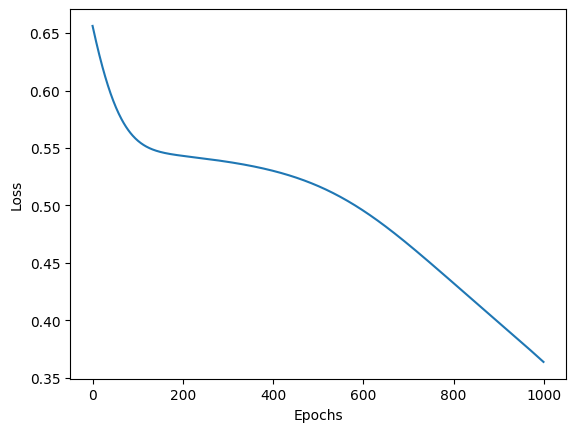

Training Losses are 
          0
0  0.606809
1  0.604752
2  0.602730
3  0.600746
4  0.598799
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[2991   53]
 [ 216  740]]
Accuracy: 0.9327, Precision: 0.9332, Recall: 0.7741, F1-score: 0.8462

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[2982   62]
 [ 205  751]]
Accuracy: 0.9333, Precision: 0.9237, Recall: 0.7856, F1-score: 0.8491



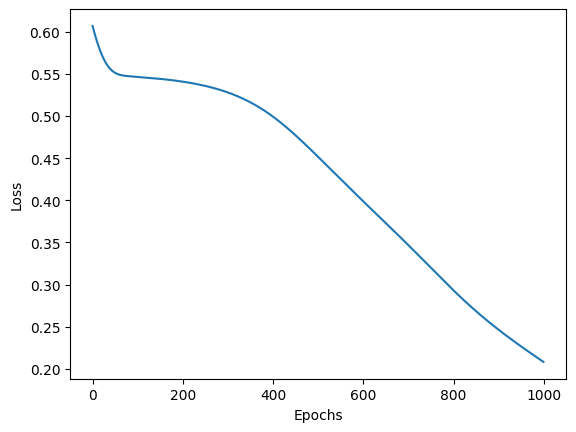

Training Losses are 
          0
0  0.702323
1  0.698481
2  0.694695
3  0.690964
4  0.687290
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2949   95]
 [ 477  479]]
Accuracy: 0.8570, Precision: 0.8345, Recall: 0.5010, F1-score: 0.6261

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2943  101]
 [ 480  476]]
Accuracy: 0.8548, Precision: 0.8250, Recall: 0.4979, F1-score: 0.6210



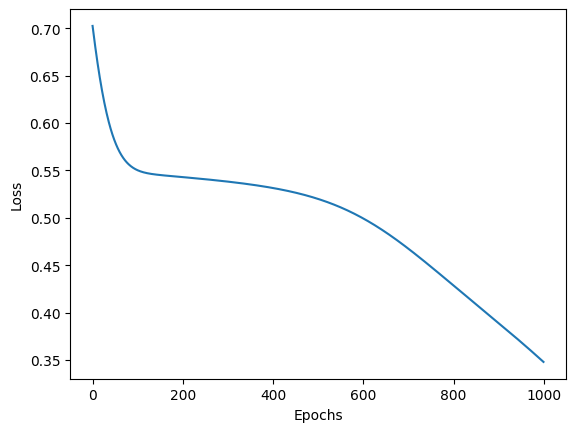

Training Losses are 
          0
0  0.873034
1  0.867515
2  0.862051
3  0.856641
4  0.851287
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3044    0]
 [ 945   11]]
Accuracy: 0.7638, Precision: 1.0000, Recall: 0.0115, F1-score: 0.0228

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3043    1]
 [ 941   15]]
Accuracy: 0.7645, Precision: 0.9375, Recall: 0.0157, F1-score: 0.0309



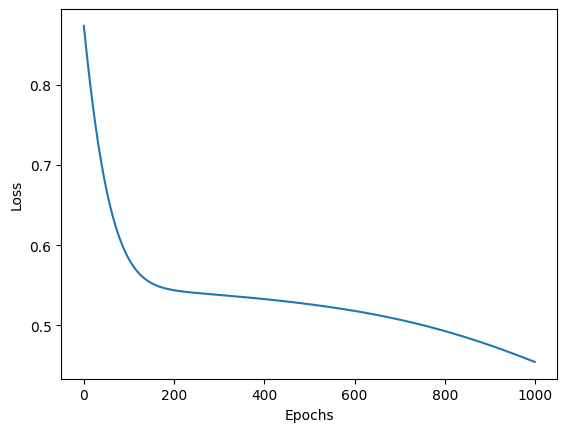

Training Losses are 
          0
0  0.665487
1  0.662777
2  0.660101
3  0.657461
4  0.654857
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[2970   74]
 [ 331  625]]
Accuracy: 0.8988, Precision: 0.8941, Recall: 0.6538, F1-score: 0.7553

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[2967   77]
 [ 320  636]]
Accuracy: 0.9008, Precision: 0.8920, Recall: 0.6653, F1-score: 0.7621



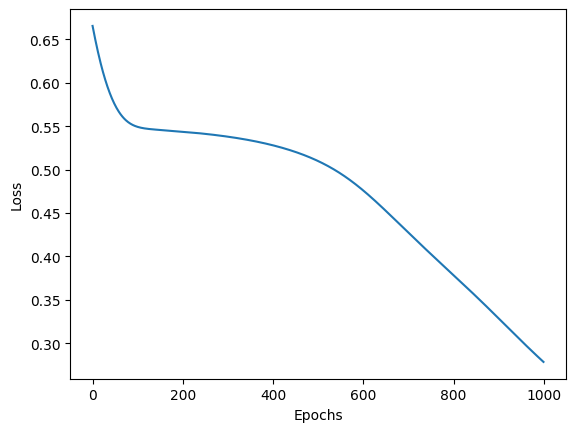

Training Losses are 
          0
0  0.678306
1  0.672528
2  0.666888
3  0.661389
4  0.656034
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[2978   66]
 [ 196  760]]
Accuracy: 0.9345, Precision: 0.9201, Recall: 0.7950, F1-score: 0.8530

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[2971   73]
 [ 187  769]]
Accuracy: 0.9350, Precision: 0.9133, Recall: 0.8044, F1-score: 0.8554



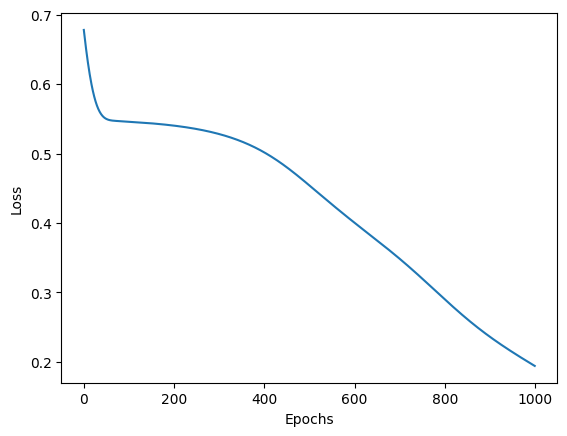

Training Losses are 
          0
0  0.967653
1  0.957193
2  0.946882
3  0.936723
4  0.926717
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2965   79]
 [ 590  366]]
Accuracy: 0.8327, Precision: 0.8225, Recall: 0.3828, F1-score: 0.5225

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2963   81]
 [ 592  364]]
Accuracy: 0.8317, Precision: 0.8180, Recall: 0.3808, F1-score: 0.5196



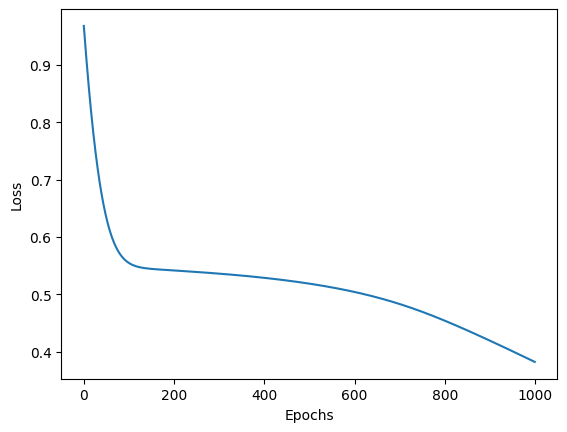

Training Losses are 
          0
0  0.757881
1  0.750400
2  0.743069
3  0.735890
4  0.728865
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2956   88]
 [ 356  600]]
Accuracy: 0.8890, Precision: 0.8721, Recall: 0.6276, F1-score: 0.7299

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2958   86]
 [ 344  612]]
Accuracy: 0.8925, Precision: 0.8768, Recall: 0.6402, F1-score: 0.7400



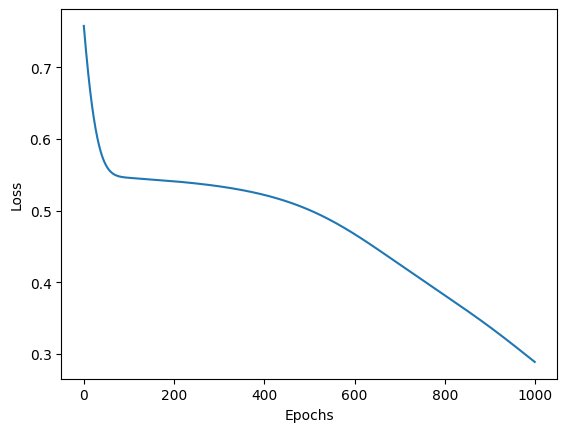

Training Losses are 
          0
0  0.626297
1  0.621992
2  0.617819
3  0.613780
4  0.609876
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[2990   54]
 [ 139  817]]
Accuracy: 0.9517, Precision: 0.9380, Recall: 0.8546, F1-score: 0.8944

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2991   53]
 [ 131  825]]
Accuracy: 0.9540, Precision: 0.9396, Recall: 0.8630, F1-score: 0.8997



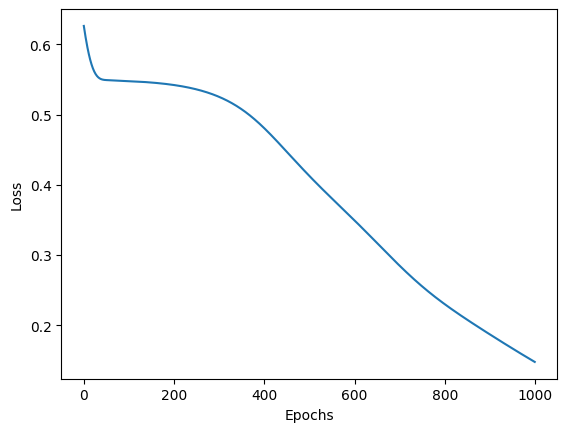

Training Losses are 
          0
0  0.746344
1  0.734137
2  0.722356
3  0.711007
4  0.700093
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2966   78]
 [ 194  762]]
Accuracy: 0.9320, Precision: 0.9071, Recall: 0.7971, F1-score: 0.8486

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2970   74]
 [ 183  773]]
Accuracy: 0.9357, Precision: 0.9126, Recall: 0.8086, F1-score: 0.8575



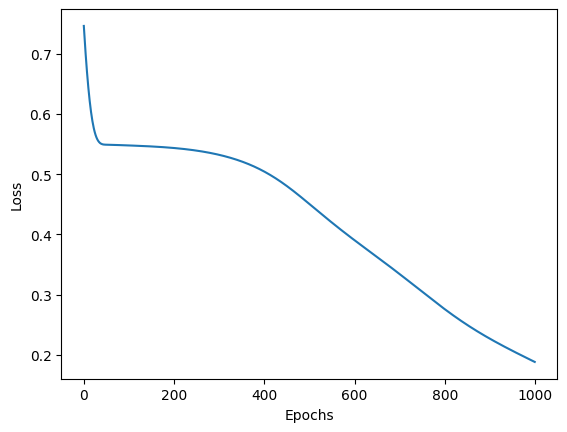

Training Losses are 
          0
0  0.739815
1  0.727777
2  0.716163
3  0.704981
4  0.694236
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2991   53]
 [ 128  828]]
Accuracy: 0.9547, Precision: 0.9398, Recall: 0.8661, F1-score: 0.9015

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2991   53]
 [ 123  833]]
Accuracy: 0.9560, Precision: 0.9402, Recall: 0.8713, F1-score: 0.9045



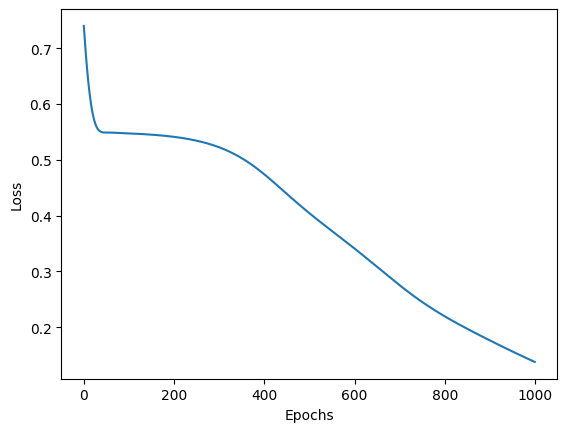

Training Losses are 
          0
0  0.710142
1  0.698832
2  0.687966
3  0.677551
4  0.667594
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2990   54]
 [ 128  828]]
Accuracy: 0.9545, Precision: 0.9388, Recall: 0.8661, F1-score: 0.9010

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2990   54]
 [ 123  833]]
Accuracy: 0.9557, Precision: 0.9391, Recall: 0.8713, F1-score: 0.9040



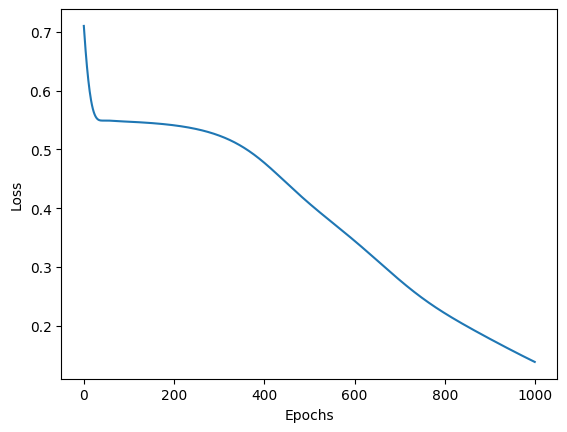

Training Losses are 
          0
0  0.709675
1  0.698440
2  0.687648
3  0.677306
4  0.667418
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2970   74]
 [ 210  746]]
Accuracy: 0.9290, Precision: 0.9098, Recall: 0.7803, F1-score: 0.8401

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2969   75]
 [ 206  750]]
Accuracy: 0.9297, Precision: 0.9091, Recall: 0.7845, F1-score: 0.8422



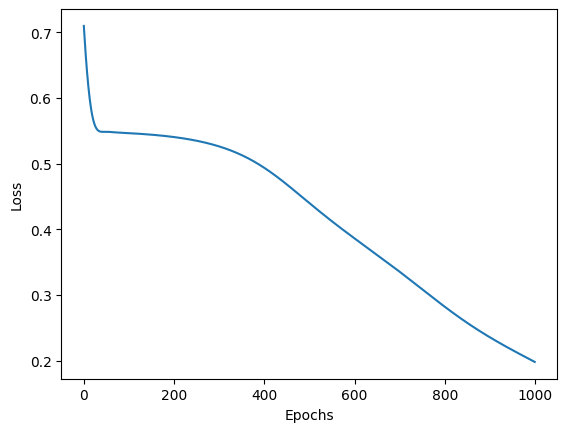

Training Losses are 
          0
0  0.761446
1  0.757635
2  0.753866
3  0.750138
4  0.746453
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[2953   91]
 [ 557  399]]
Accuracy: 0.8380, Precision: 0.8143, Recall: 0.4174, F1-score: 0.5519

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[2951   93]
 [ 562  394]]
Accuracy: 0.8363, Precision: 0.8090, Recall: 0.4121, F1-score: 0.5461



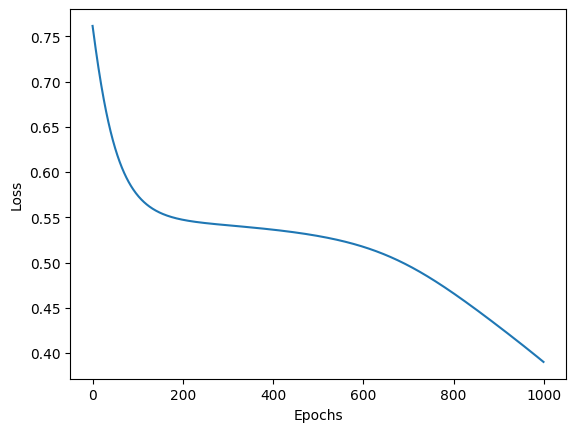

Training Losses are 
          0
0  0.670561
1  0.667791
2  0.665055
3  0.662355
4  0.659692
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[2965   79]
 [ 366  590]]
Accuracy: 0.8888, Precision: 0.8819, Recall: 0.6172, F1-score: 0.7262

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[2965   79]
 [ 347  609]]
Accuracy: 0.8935, Precision: 0.8852, Recall: 0.6370, F1-score: 0.7409



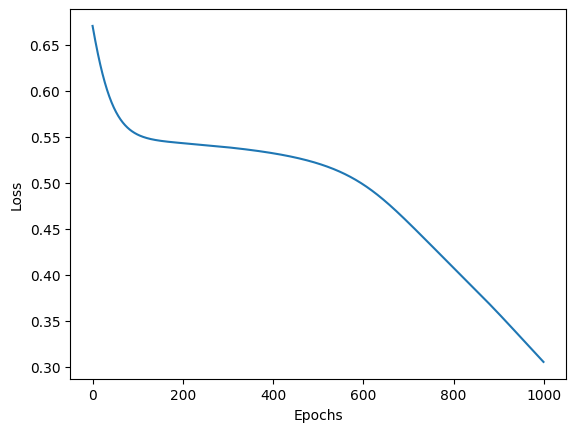

Training Losses are 
          0
0  0.568765
1  0.567626
2  0.566522
3  0.565453
4  0.564421
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[3007   37]
 [  86  870]]
Accuracy: 0.9692, Precision: 0.9592, Recall: 0.9100, F1-score: 0.9340

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3010   34]
 [  86  870]]
Accuracy: 0.9700, Precision: 0.9624, Recall: 0.9100, F1-score: 0.9355



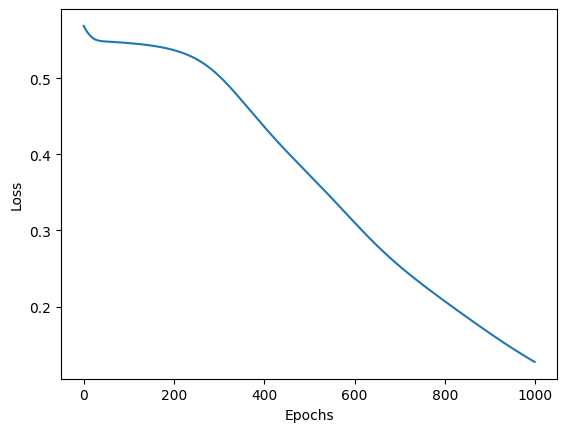

Training Losses are 
          0
0  0.598720
1  0.597176
2  0.595655
3  0.594158
4  0.592686
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[2997   47]
 [ 185  771]]
Accuracy: 0.9420, Precision: 0.9425, Recall: 0.8065, F1-score: 0.8692

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[2998   46]
 [ 178  778]]
Accuracy: 0.9440, Precision: 0.9442, Recall: 0.8138, F1-score: 0.8742



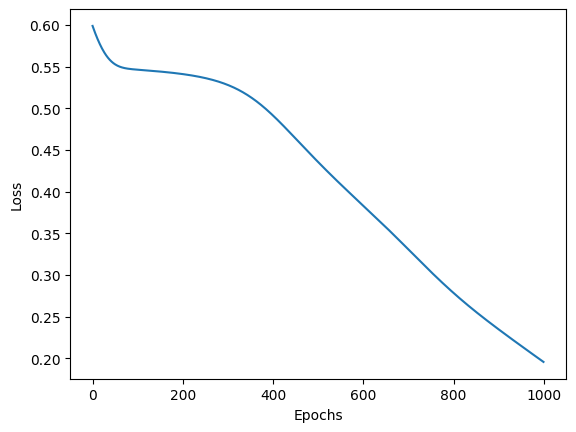

Training Losses are 
          0
0  0.623129
1  0.620035
2  0.617005
3  0.614039
4  0.611140
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[3002   42]
 [ 142  814]]
Accuracy: 0.9540, Precision: 0.9509, Recall: 0.8515, F1-score: 0.8985

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[3000   44]
 [ 132  824]]
Accuracy: 0.9560, Precision: 0.9493, Recall: 0.8619, F1-score: 0.9035



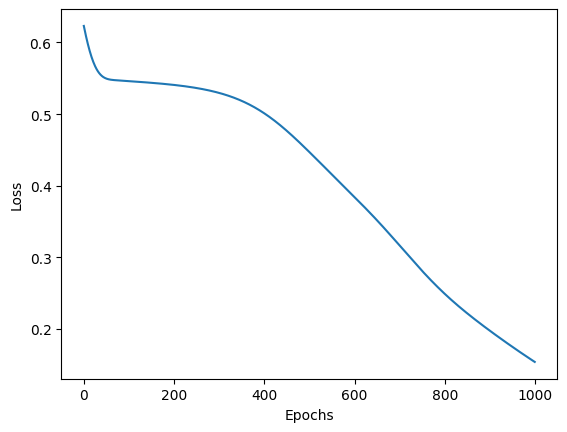

Training Losses are 
          0
0  0.685814
1  0.681365
2  0.677002
3  0.672727
4  0.668540
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2974   70]
 [ 219  737]]
Accuracy: 0.9277, Precision: 0.9133, Recall: 0.7709, F1-score: 0.8361

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[2972   72]
 [ 208  748]]
Accuracy: 0.9300, Precision: 0.9122, Recall: 0.7824, F1-score: 0.8423



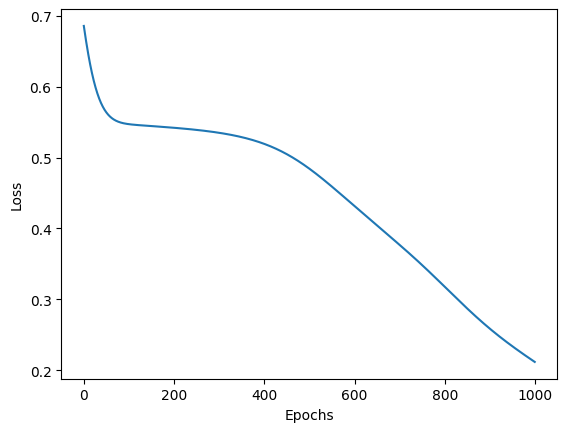

Training Losses are 
          0
0  0.630652
1  0.627311
2  0.624049
3  0.620868
4  0.617766
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2996   48]
 [ 119  837]]
Accuracy: 0.9583, Precision: 0.9458, Recall: 0.8755, F1-score: 0.9093

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2998   46]
 [ 114  842]]
Accuracy: 0.9600, Precision: 0.9482, Recall: 0.8808, F1-score: 0.9132



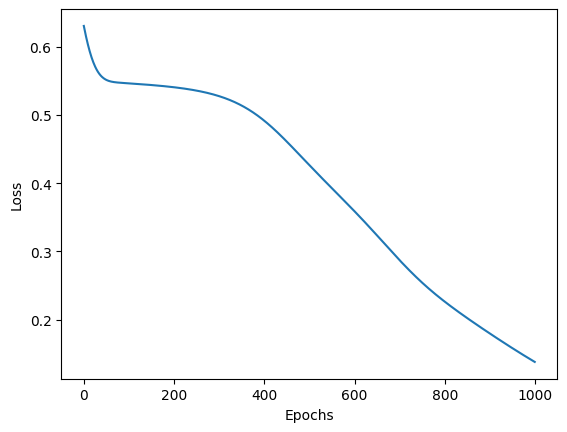

Training Losses are 
          0
0  0.610168
1  0.607564
2  0.605016
3  0.602527
4  0.600097
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3004   40]
 [  93  863]]
Accuracy: 0.9667, Precision: 0.9557, Recall: 0.9027, F1-score: 0.9285

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3004   40]
 [  92  864]]
Accuracy: 0.9670, Precision: 0.9558, Recall: 0.9038, F1-score: 0.9290



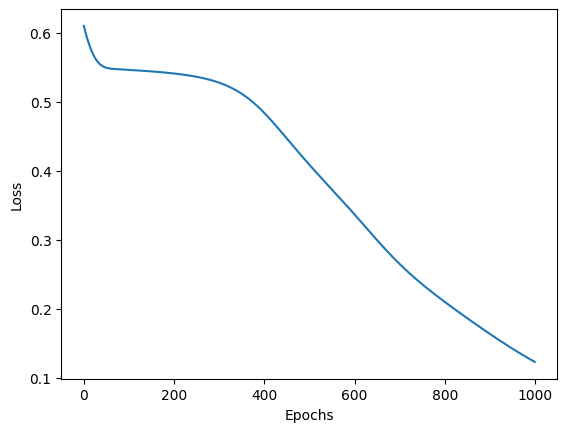

Training Losses are 
          0
0  0.602949
1  0.598573
2  0.594394
3  0.590415
4  0.586638
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[3017   27]
 [  33  923]]
Accuracy: 0.9850, Precision: 0.9716, Recall: 0.9655, F1-score: 0.9685

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[3023   21]
 [  32  924]]
Accuracy: 0.9868, Precision: 0.9778, Recall: 0.9665, F1-score: 0.9721



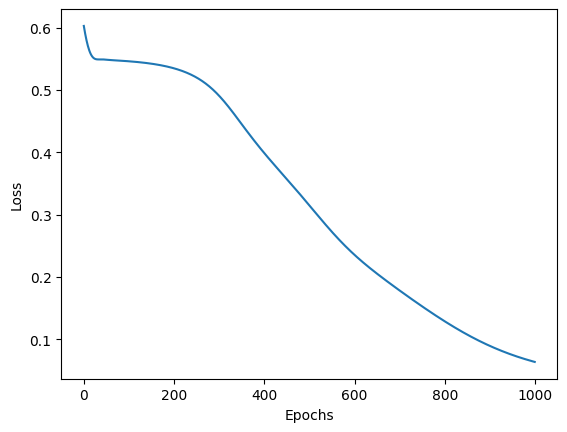

Training Losses are 
          0
0  0.733822
1  0.725293
2  0.716979
3  0.708884
4  0.701012
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2977   67]
 [ 202  754]]
Accuracy: 0.9327, Precision: 0.9184, Recall: 0.7887, F1-score: 0.8486

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2973   71]
 [ 193  763]]
Accuracy: 0.9340, Precision: 0.9149, Recall: 0.7981, F1-score: 0.8525



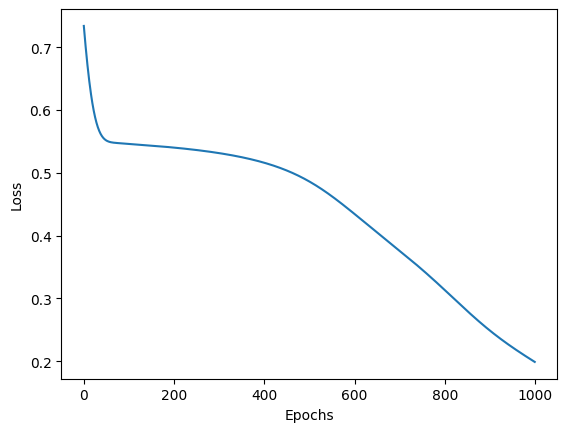

Training Losses are 
          0
0  0.666937
1  0.660612
2  0.654478
3  0.648538
4  0.642793
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[3006   38]
 [  76  880]]
Accuracy: 0.9715, Precision: 0.9586, Recall: 0.9205, F1-score: 0.9392

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[3009   35]
 [  80  876]]
Accuracy: 0.9712, Precision: 0.9616, Recall: 0.9163, F1-score: 0.9384



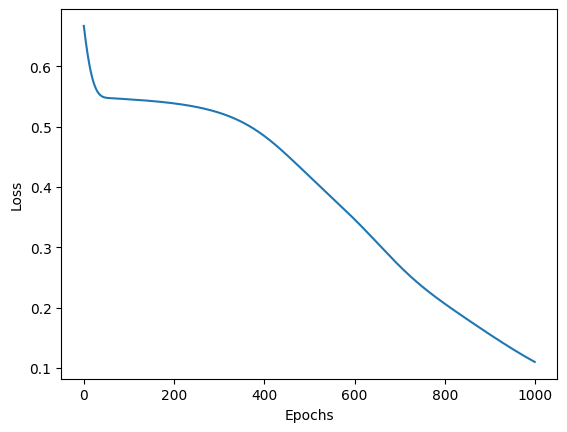

Training Losses are 
          0
0  0.722889
1  0.714770
2  0.706863
3  0.699171
4  0.691698
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2993   51]
 [ 139  817]]
Accuracy: 0.9525, Precision: 0.9412, Recall: 0.8546, F1-score: 0.8958

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2994   50]
 [ 131  825]]
Accuracy: 0.9547, Precision: 0.9429, Recall: 0.8630, F1-score: 0.9011



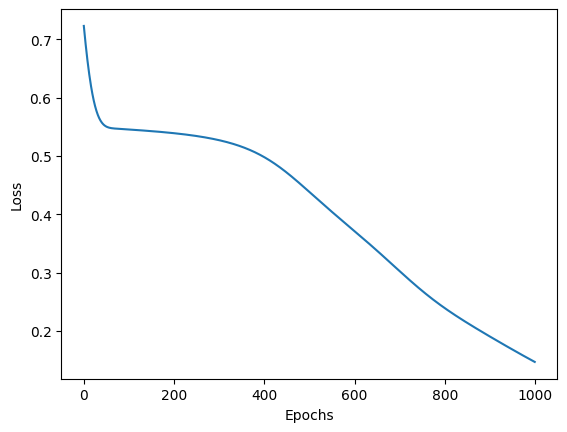

Training Losses are 
          0
0  0.804972
1  0.787848
2  0.771336
3  0.755453
4  0.740211
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[3002   42]
 [  98  858]]
Accuracy: 0.9650, Precision: 0.9533, Recall: 0.8975, F1-score: 0.9246

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[3002   42]
 [  93  863]]
Accuracy: 0.9663, Precision: 0.9536, Recall: 0.9027, F1-score: 0.9275



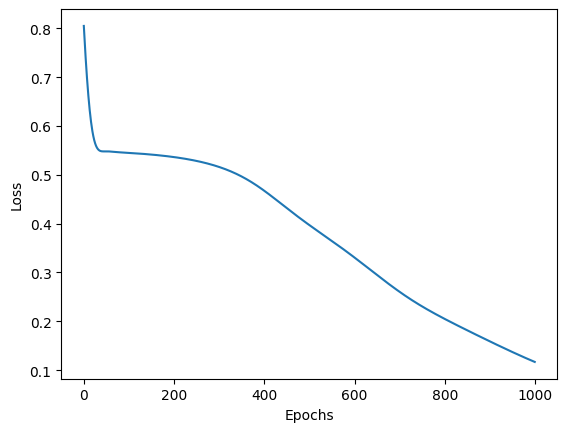

Training Losses are 
          0
0  0.739321
1  0.725087
2  0.711463
3  0.698457
4  0.686076
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[3005   39]
 [  65  891]]
Accuracy: 0.9740, Precision: 0.9581, Recall: 0.9320, F1-score: 0.9449

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[3012   32]
 [  71  885]]
Accuracy: 0.9742, Precision: 0.9651, Recall: 0.9257, F1-score: 0.9450



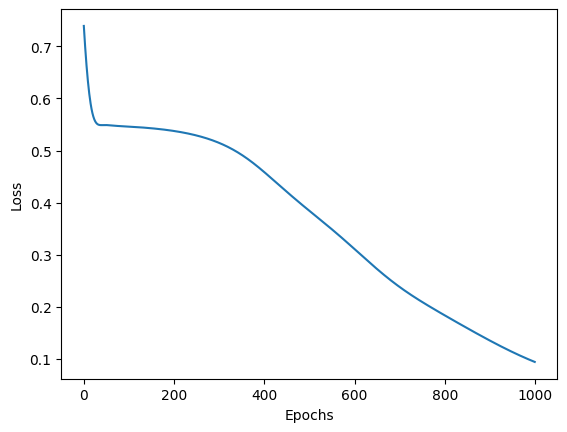

Training Losses are 
          0
0  0.807163
1  0.789482
2  0.772477
3  0.756161
4  0.740544
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[3004   40]
 [ 101  855]]
Accuracy: 0.9647, Precision: 0.9553, Recall: 0.8944, F1-score: 0.9238

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[3003   41]
 [  95  861]]
Accuracy: 0.9660, Precision: 0.9545, Recall: 0.9006, F1-score: 0.9268



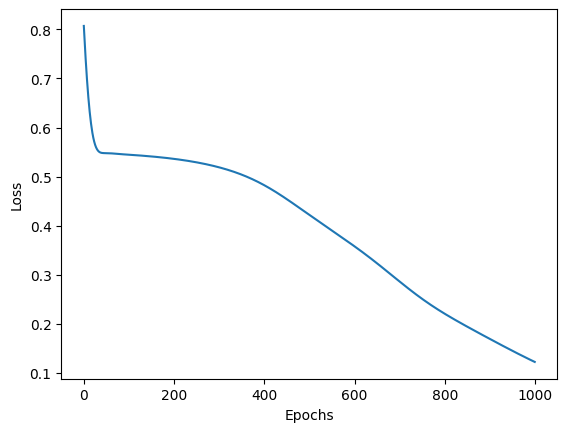

Training Losses are 
          0
0  0.659276
1  0.648805
2  0.638893
3  0.629546
4  0.620767
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[3020   24]
 [  20  936]]
Accuracy: 0.9890, Precision: 0.9750, Recall: 0.9791, F1-score: 0.9770

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[3026   18]
 [  17  939]]
Accuracy: 0.9912, Precision: 0.9812, Recall: 0.9822, F1-score: 0.9817



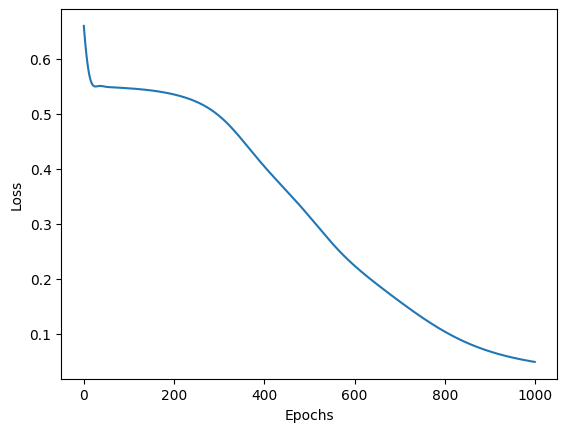

Training Losses are 
          0
0  0.675202
1  0.671008
2  0.666897
3  0.662870
4  0.658931
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3001   43]
 [ 161  795]]
Accuracy: 0.9490, Precision: 0.9487, Recall: 0.8316, F1-score: 0.8863

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3000   44]
 [ 150  806]]
Accuracy: 0.9515, Precision: 0.9482, Recall: 0.8431, F1-score: 0.8926



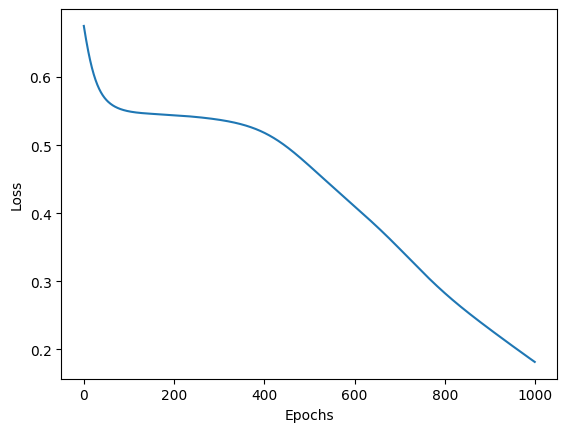

Training Losses are 
          0
0  0.614730
1  0.611828
2  0.609008
3  0.606272
4  0.603621
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[3001   43]
 [ 114  842]]
Accuracy: 0.9607, Precision: 0.9514, Recall: 0.8808, F1-score: 0.9147

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[3002   42]
 [ 106  850]]
Accuracy: 0.9630, Precision: 0.9529, Recall: 0.8891, F1-score: 0.9199



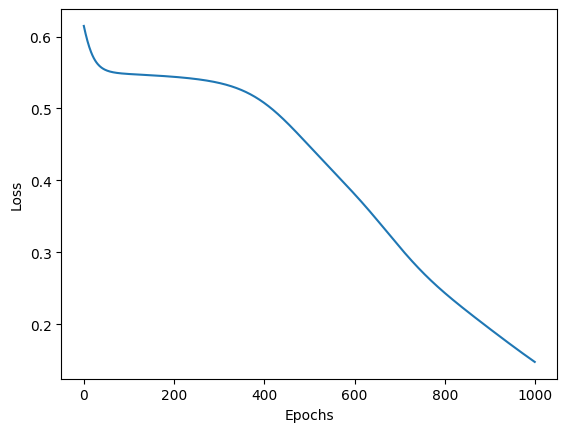

Training Losses are 
          0
0  0.706588
1  0.701437
2  0.696384
3  0.691433
4  0.686587
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[2970   74]
 [ 250  706]]
Accuracy: 0.9190, Precision: 0.9051, Recall: 0.7385, F1-score: 0.8134

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[2972   72]
 [ 230  726]]
Accuracy: 0.9245, Precision: 0.9098, Recall: 0.7594, F1-score: 0.8278



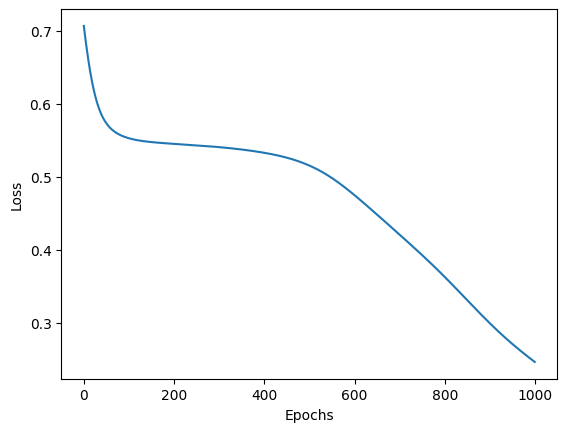

Training Losses are 
          0
0  0.916572
1  0.909932
2  0.903366
3  0.896876
4  0.890468
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[3003   41]
 [ 694  262]]
Accuracy: 0.8163, Precision: 0.8647, Recall: 0.2741, F1-score: 0.4162

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[3002   42]
 [ 687  269]]
Accuracy: 0.8177, Precision: 0.8650, Recall: 0.2814, F1-score: 0.4246



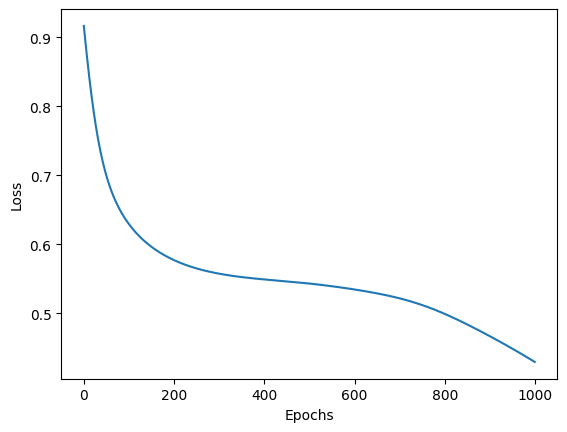

Training Losses are 
          0
0  0.582587
1  0.579436
2  0.576457
3  0.573651
4  0.571020
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[3020   24]
 [  16  940]]
Accuracy: 0.9900, Precision: 0.9751, Recall: 0.9833, F1-score: 0.9792

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[3026   18]
 [  15  941]]
Accuracy: 0.9918, Precision: 0.9812, Recall: 0.9843, F1-score: 0.9828



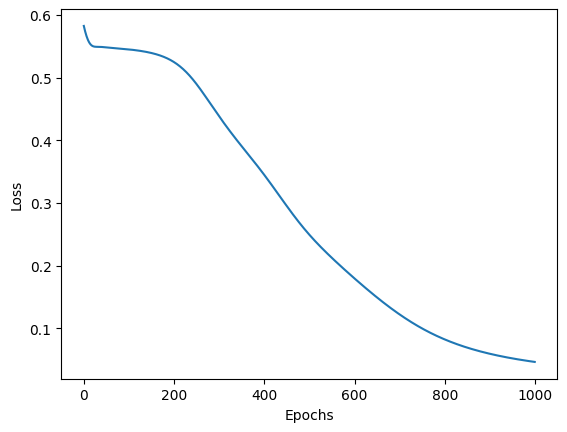

Training Losses are 
          0
0  0.614322
1  0.610017
2  0.605866
3  0.601871
4  0.598036
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[3020   24]
 [  26  930]]
Accuracy: 0.9875, Precision: 0.9748, Recall: 0.9728, F1-score: 0.9738

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[3025   19]
 [  22  934]]
Accuracy: 0.9898, Precision: 0.9801, Recall: 0.9770, F1-score: 0.9785



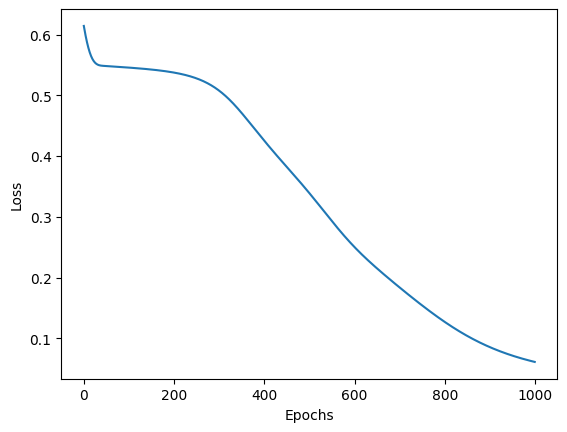

Training Losses are 
          0
0  0.767319
1  0.757830
2  0.748572
3  0.739553
4  0.730778
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[2982   62]
 [ 192  764]]
Accuracy: 0.9365, Precision: 0.9249, Recall: 0.7992, F1-score: 0.8575

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[2977   67]
 [ 178  778]]
Accuracy: 0.9387, Precision: 0.9207, Recall: 0.8138, F1-score: 0.8640



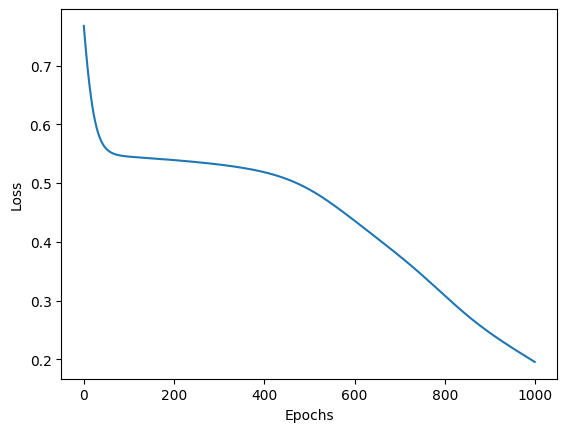

Training Losses are 
          0
0  0.820895
1  0.811354
2  0.802029
3  0.792925
4  0.784046
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[2984   60]
 [ 202  754]]
Accuracy: 0.9345, Precision: 0.9263, Recall: 0.7887, F1-score: 0.8520

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[2976   68]
 [ 194  762]]
Accuracy: 0.9345, Precision: 0.9181, Recall: 0.7971, F1-score: 0.8533



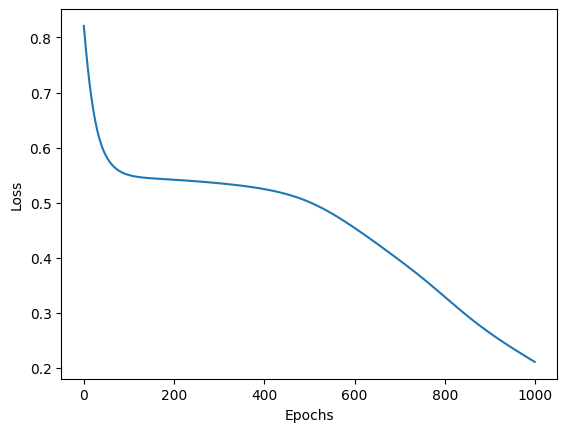

Training Losses are 
          0
0  0.692753
1  0.682830
2  0.673271
3  0.664086
4  0.655283
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[3019   25]
 [  29  927]]
Accuracy: 0.9865, Precision: 0.9737, Recall: 0.9697, F1-score: 0.9717

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[3024   20]
 [  31  925]]
Accuracy: 0.9872, Precision: 0.9788, Recall: 0.9676, F1-score: 0.9732



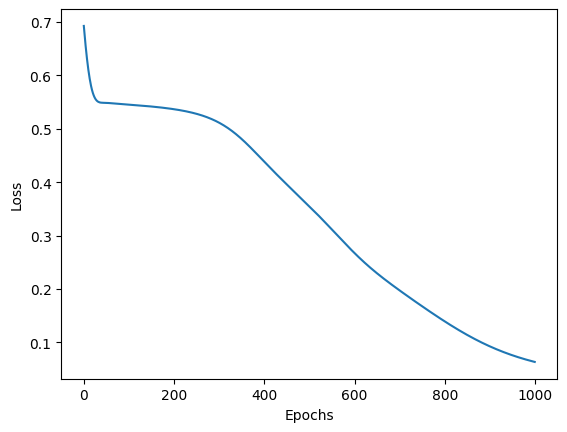

Training Losses are 
          0
0  0.643163
1  0.634297
2  0.625892
3  0.617959
4  0.610506
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[3018   26]
 [  21  935]]
Accuracy: 0.9882, Precision: 0.9729, Recall: 0.9780, F1-score: 0.9755

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[3026   18]
 [  19  937]]
Accuracy: 0.9908, Precision: 0.9812, Recall: 0.9801, F1-score: 0.9806



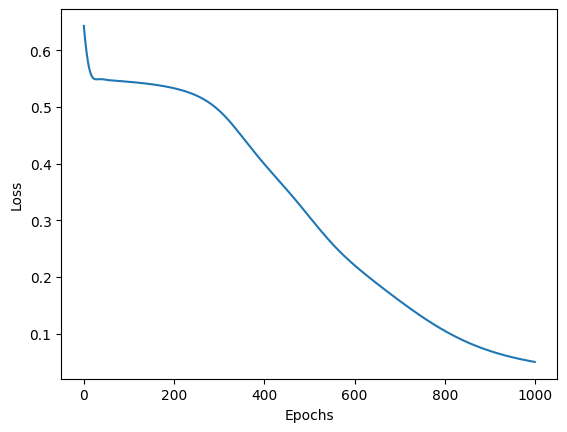

Training Losses are 
          0
0  0.645119
1  0.636903
2  0.629090
3  0.621687
4  0.614697
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[3020   24]
 [  16  940]]
Accuracy: 0.9900, Precision: 0.9751, Recall: 0.9833, F1-score: 0.9792

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[3026   18]
 [  15  941]]
Accuracy: 0.9918, Precision: 0.9812, Recall: 0.9843, F1-score: 0.9828



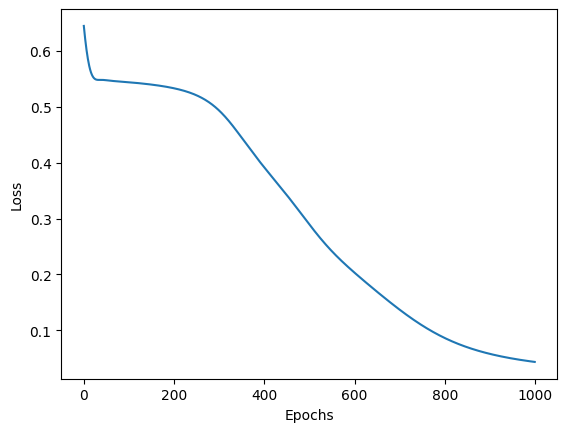

Training Losses are 
          0
0  0.687444
1  0.677229
2  0.667420
3  0.658029
4  0.649062
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[3018   26]
 [  29  927]]
Accuracy: 0.9862, Precision: 0.9727, Recall: 0.9697, F1-score: 0.9712

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[3026   18]
 [  29  927]]
Accuracy: 0.9882, Precision: 0.9810, Recall: 0.9697, F1-score: 0.9753



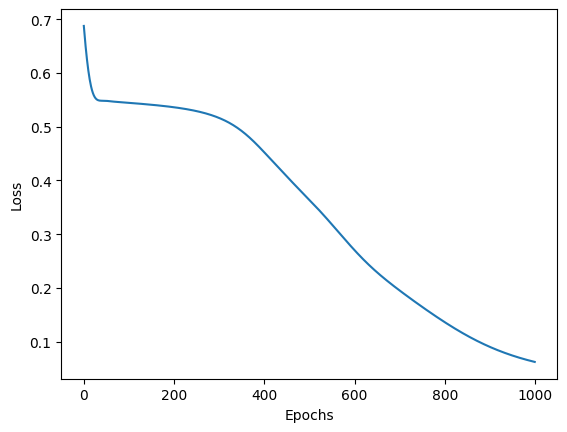

Training Losses are 
          0
0  0.789598
1  0.766631
2  0.744932
3  0.724524
4  0.705422
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[3020   24]
 [  26  930]]
Accuracy: 0.9875, Precision: 0.9748, Recall: 0.9728, F1-score: 0.9738

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[3025   19]
 [  22  934]]
Accuracy: 0.9898, Precision: 0.9801, Recall: 0.9770, F1-score: 0.9785



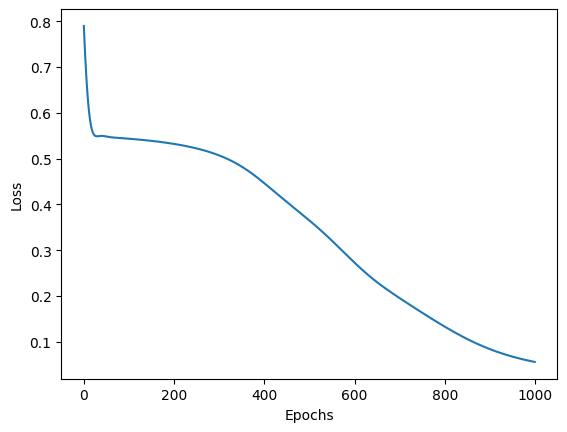

Training Losses are 
          0
0  0.767380
1  0.746547
2  0.726831
3  0.708258
4  0.690845
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[3021   23]
 [  17  939]]
Accuracy: 0.9900, Precision: 0.9761, Recall: 0.9822, F1-score: 0.9791

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[3026   18]
 [  16  940]]
Accuracy: 0.9915, Precision: 0.9812, Recall: 0.9833, F1-score: 0.9822



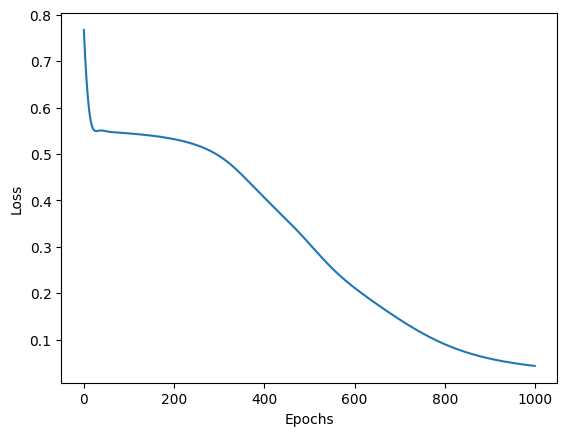

Training Losses are 
          0
0  0.790448
1  0.769850
2  0.750258
3  0.731689
4  0.714156
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[3020   24]
 [  20  936]]
Accuracy: 0.9890, Precision: 0.9750, Recall: 0.9791, F1-score: 0.9770

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[3026   18]
 [  17  939]]
Accuracy: 0.9912, Precision: 0.9812, Recall: 0.9822, F1-score: 0.9817



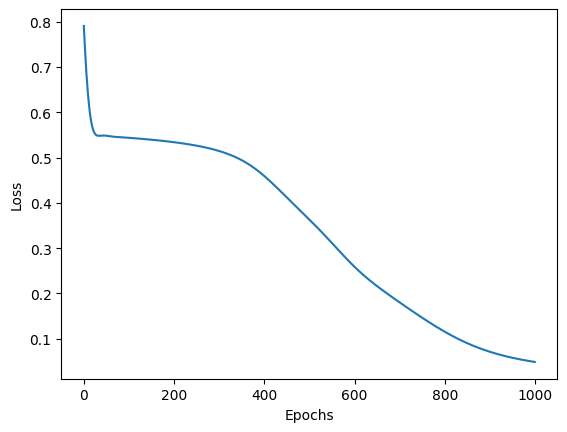

Training Losses are 
          0
0  0.592893
1  0.584418
2  0.576924
3  0.570413
4  0.564874
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[3023   21]
 [   9  947]]
Accuracy: 0.9925, Precision: 0.9783, Recall: 0.9906, F1-score: 0.9844

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[3027   17]
 [  11  945]]
Accuracy: 0.9930, Precision: 0.9823, Recall: 0.9885, F1-score: 0.9854



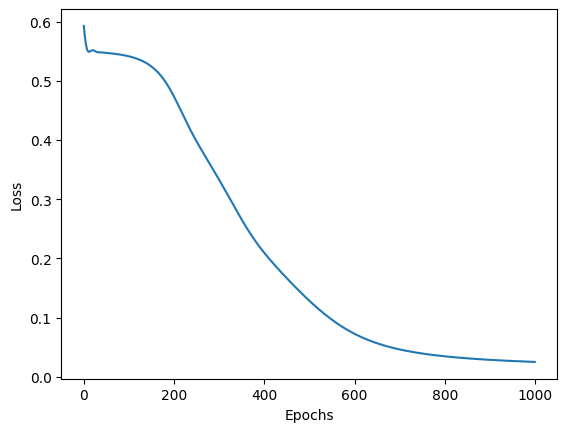

The best accuracy on test data is 0.993 for layers 64 , 64, 64


In [19]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(16,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")

Training Losses are 
          0
0  0.651382
1  0.650001
2  0.648641
3  0.647300
4  0.645979
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


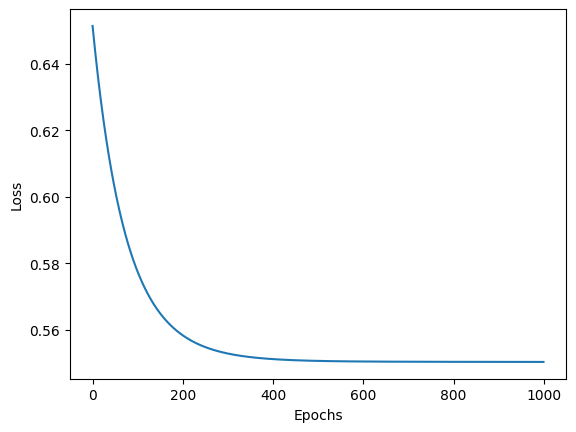

Training Losses are 
          0
0  0.596959
1  0.596358
2  0.595765
3  0.595180
4  0.594603
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


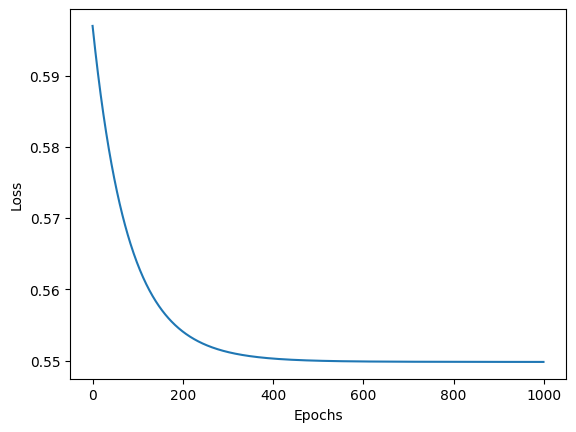

Training Losses are 
          0
0  0.691835
1  0.689926
2  0.688045
3  0.686190
4  0.684362
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


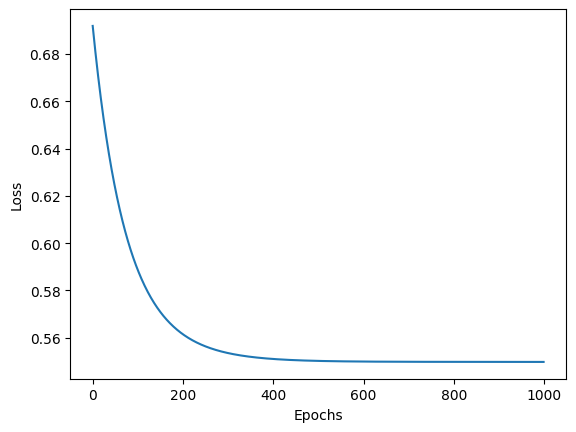

Training Losses are 
          0
0  0.654468
1  0.653110
2  0.651771
3  0.650450
4  0.649147
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


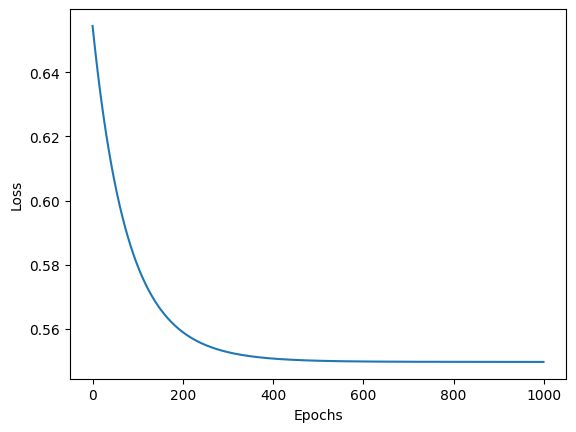

Training Losses are 
          0
0  0.612131
1  0.610632
2  0.609173
3  0.607750
4  0.606364
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


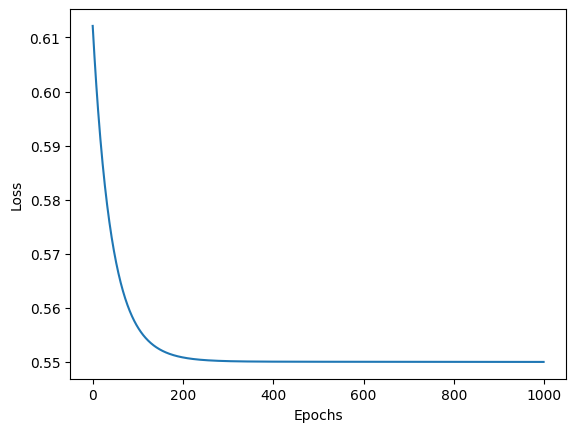

Training Losses are 
          0
0  0.650238
1  0.648031
2  0.645876
3  0.643772
4  0.641717
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


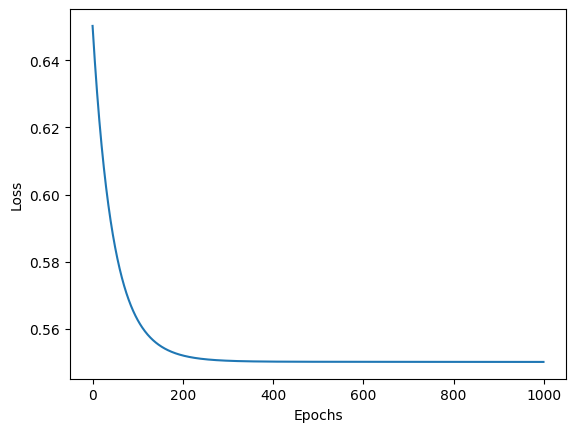

Training Losses are 
          0
0  0.692987
1  0.689233
2  0.685581
3  0.682030
4  0.678576
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


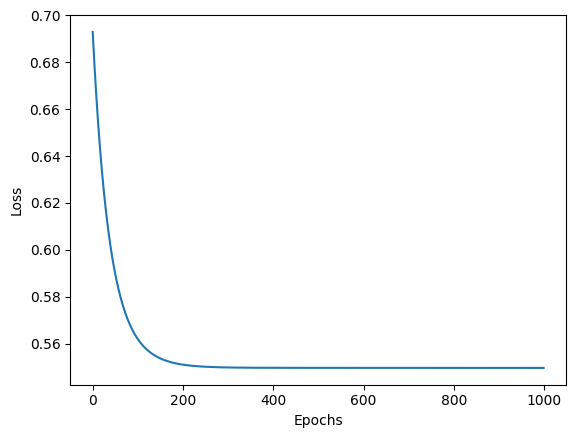

Training Losses are 
          0
0  0.846055
1  0.838827
2  0.831774
3  0.824893
4  0.818179
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


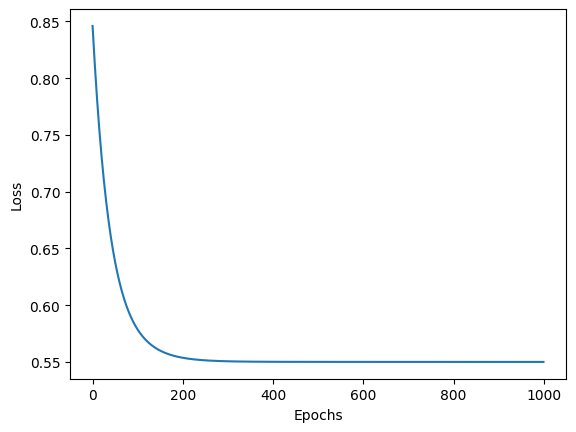

Training Losses are 
          0
0  0.641974
1  0.637882
2  0.633983
3  0.630268
4  0.626727
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


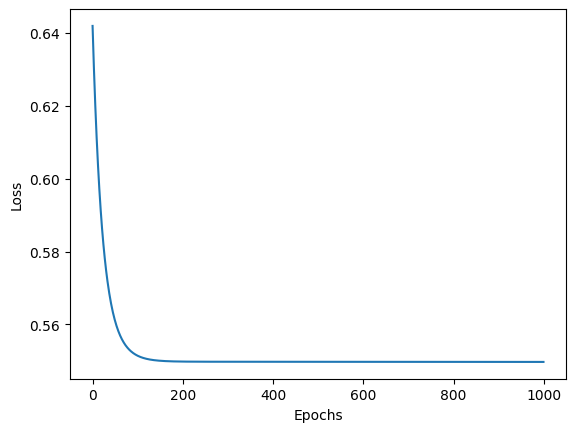

Training Losses are 
          0
0  0.704754
1  0.697652
2  0.690890
3  0.684453
4  0.678326
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


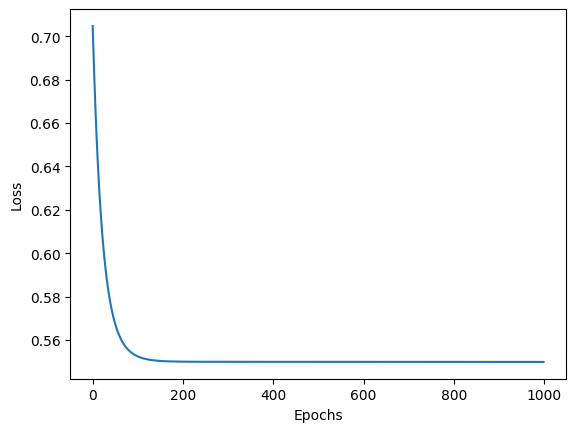

Training Losses are 
          0
0  0.619596
1  0.616575
2  0.613694
3  0.610947
4  0.608326
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


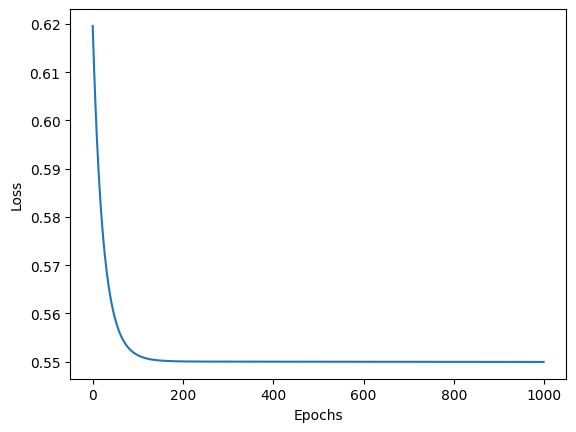

Training Losses are 
          0
0  0.581607
1  0.580363
2  0.579171
3  0.578028
4  0.576932
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


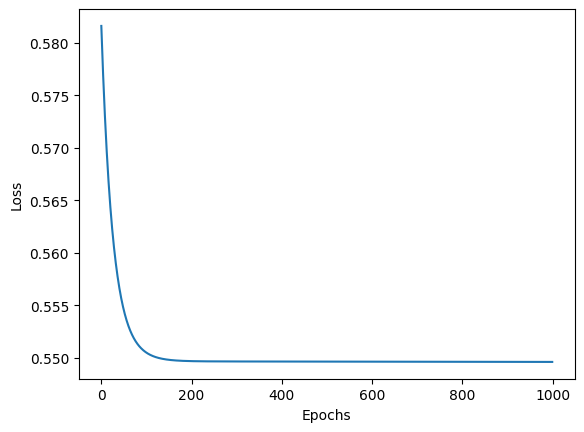

Training Losses are 
          0
0  0.657749
1  0.649129
2  0.641240
3  0.634017
4  0.627402
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


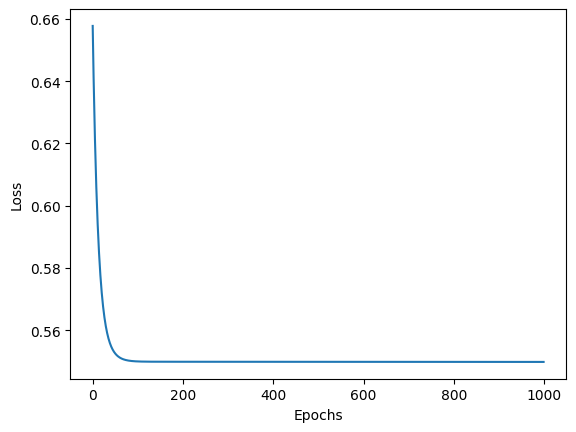

Training Losses are 
          0
0  0.777286
1  0.758470
2  0.741241
3  0.725475
4  0.711053
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


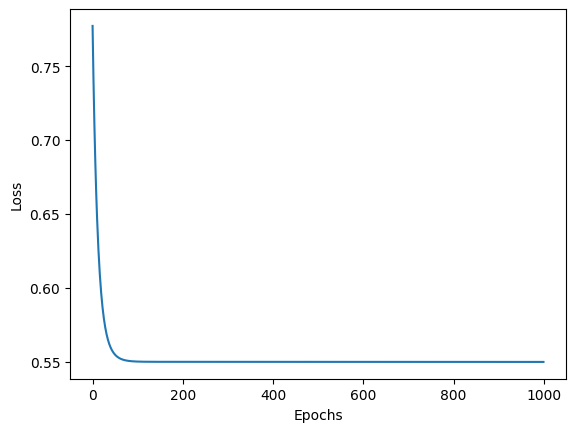

Training Losses are 
          0
0  0.716661
1  0.703152
2  0.690784
3  0.679461
4  0.669095
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


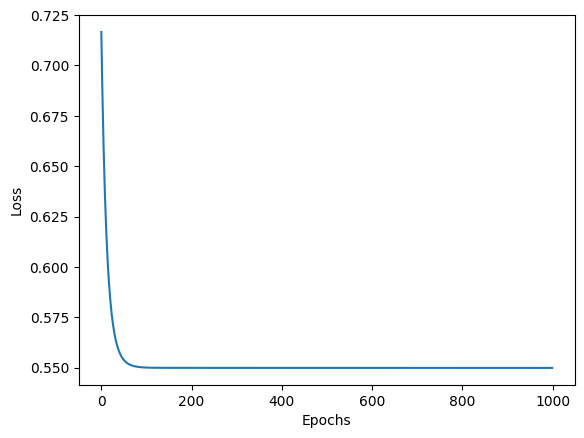

Training Losses are 
          0
0  0.782747
1  0.762721
2  0.744447
3  0.727784
4  0.712595
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


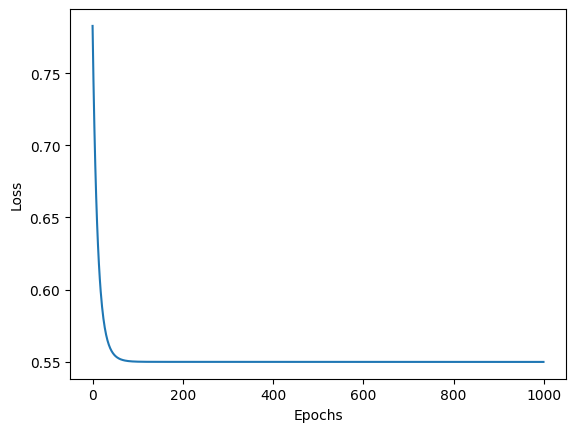

Training Losses are 
          0
0  0.947580
1  0.941232
2  0.934983
3  0.928831
4  0.922776
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


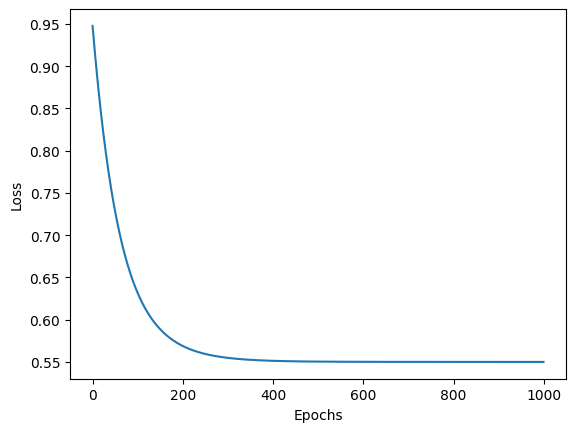

Training Losses are 
          0
0  0.666399
1  0.664527
2  0.662687
3  0.660877
4  0.659098
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


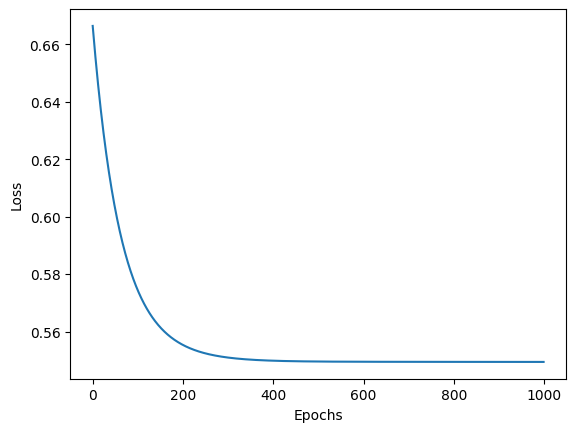

Training Losses are 
          0
0  0.744278
1  0.741504
2  0.738770
3  0.736076
4  0.733421
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


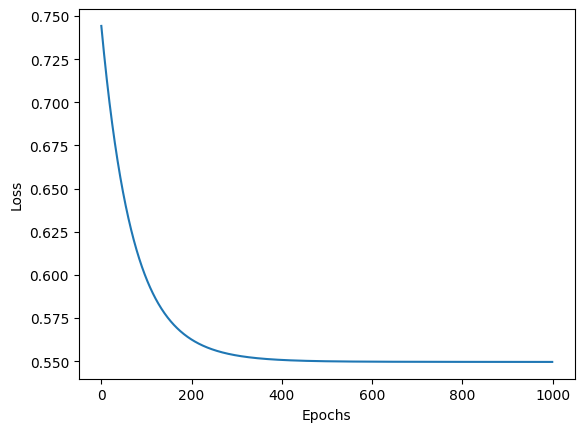

Training Losses are 
          0
0  0.699046
1  0.696703
2  0.694399
3  0.692133
4  0.689903
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


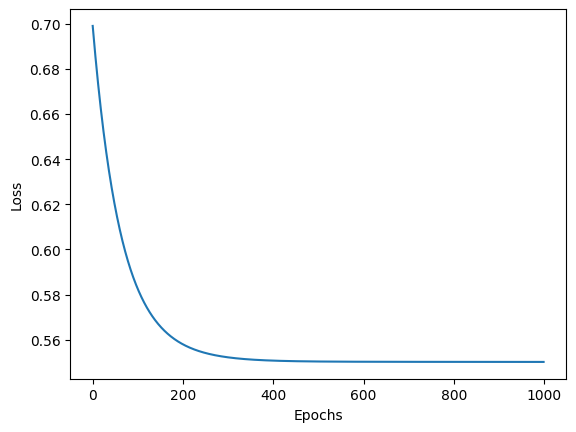

Training Losses are 
          0
0  0.756827
1  0.751867
2  0.747030
3  0.742311
4  0.737710
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


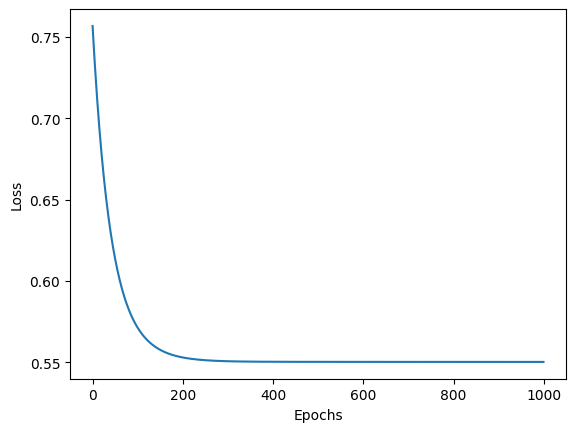

Training Losses are 
          0
0  0.672723
1  0.669557
2  0.666477
3  0.663481
4  0.660566
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


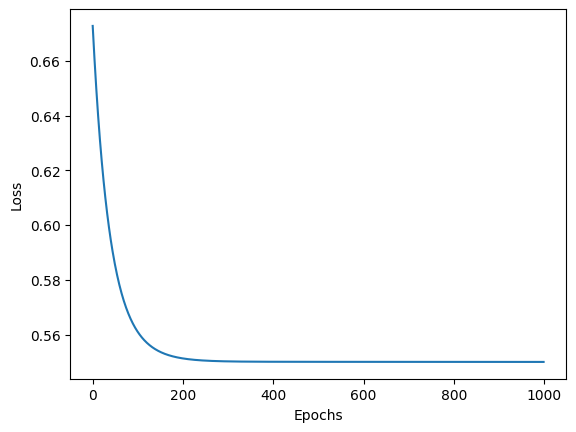

Training Losses are 
          0
0  0.659170
1  0.656900
2  0.654680
3  0.652509
4  0.650386
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


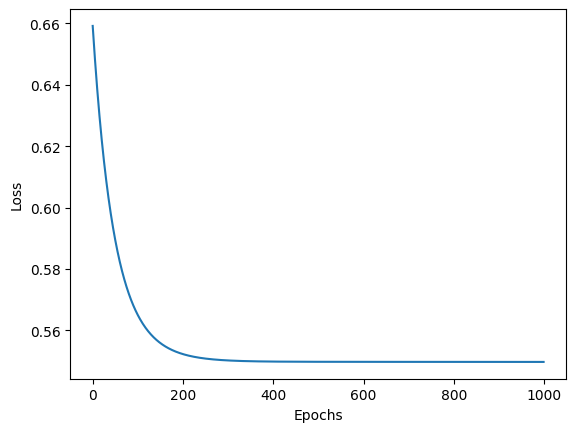

Training Losses are 
          0
0  0.833459
1  0.826975
2  0.820640
3  0.814450
4  0.808403
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


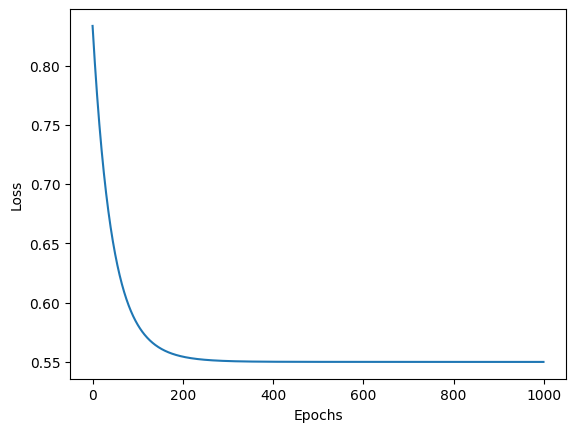

Training Losses are 
          0
0  0.707275
1  0.700641
2  0.694299
3  0.688236
4  0.682439
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


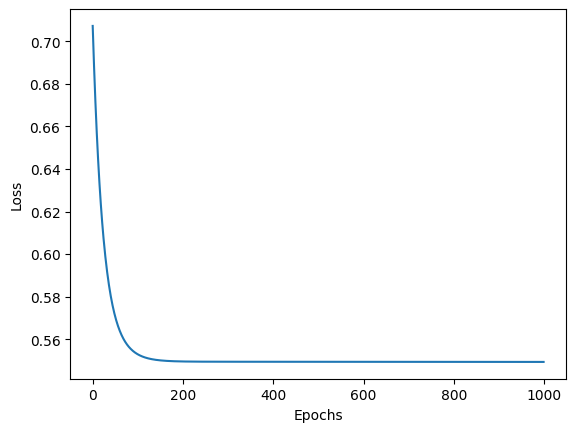

Training Losses are 
          0
0  0.657111
1  0.652821
2  0.648713
3  0.644779
4  0.641013
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


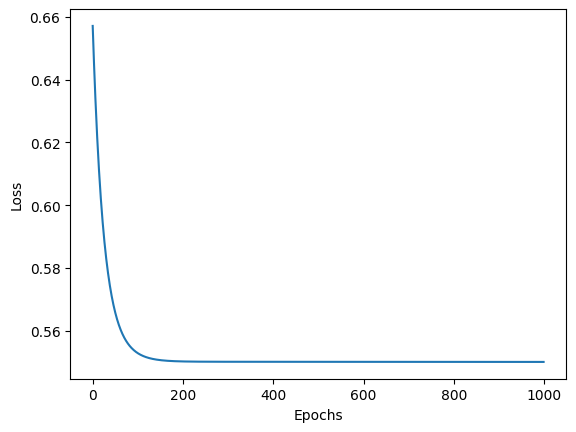

Training Losses are 
          0
0  0.718987
1  0.711526
2  0.704409
3  0.697621
4  0.691145
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


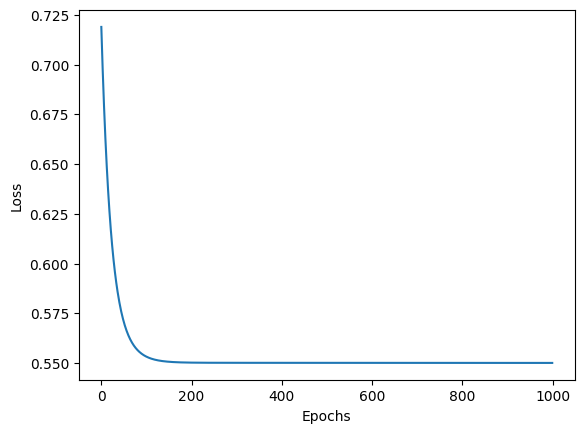

Training Losses are 
          0
0  0.680480
1  0.675110
2  0.669972
3  0.665056
4  0.660354
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


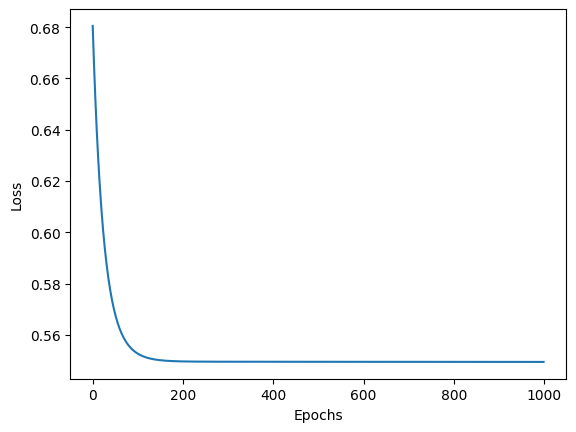

Training Losses are 
          0
0  0.683379
1  0.673063
2  0.663588
3  0.654884
4  0.646887
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


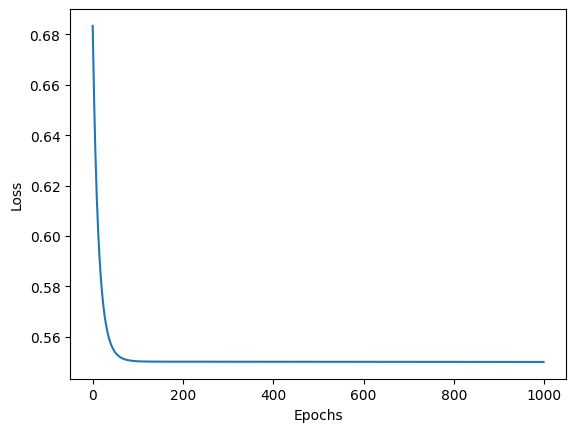

Training Losses are 
          0
0  0.627252
1  0.620843
2  0.614998
3  0.609664
4  0.604795
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


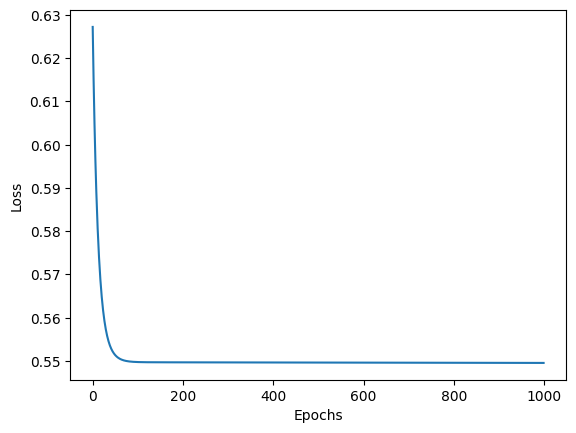

Training Losses are 
          0
0  0.776130
1  0.757847
2  0.741069
3  0.725680
4  0.711571
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


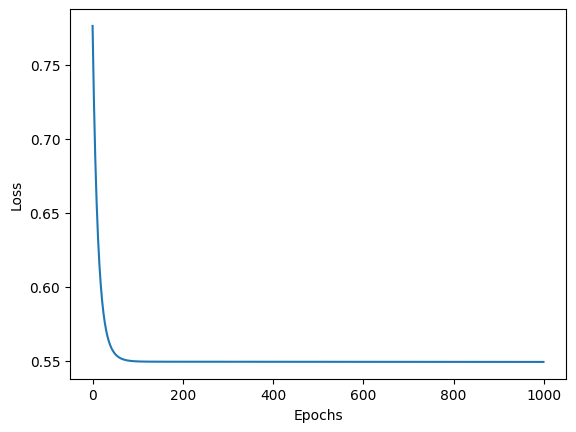

Training Losses are 
          0
0  0.749501
1  0.732871
2  0.717672
3  0.703783
4  0.691095
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


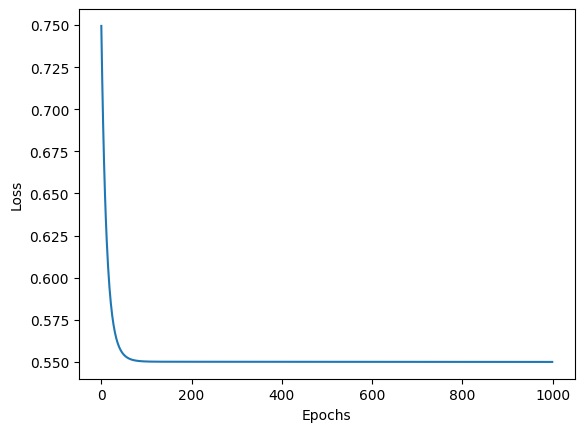

Training Losses are 
          0
0  0.767379
1  0.763409
2  0.759513
3  0.755691
4  0.751940
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


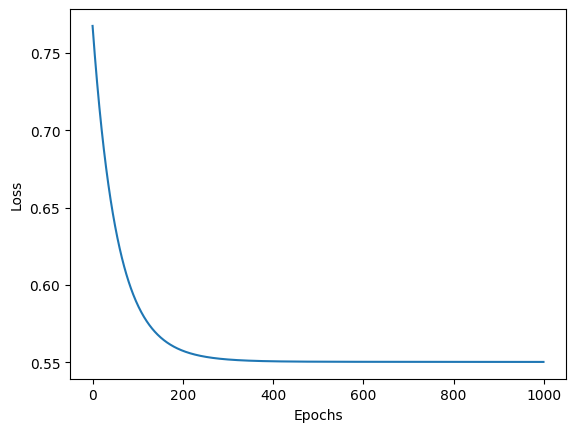

Training Losses are 
          0
0  0.710148
1  0.707620
2  0.705134
3  0.702690
4  0.700286
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


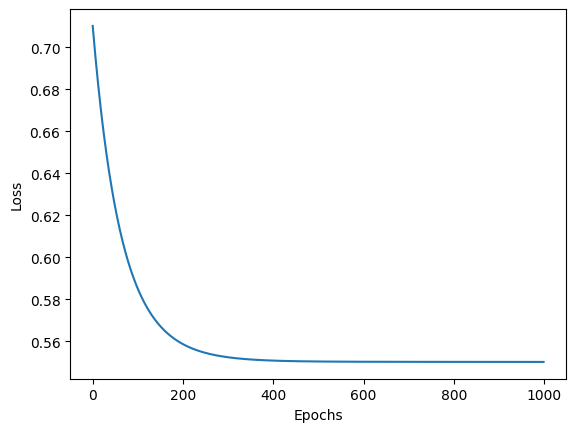

Training Losses are 
          0
0  0.649783
1  0.648212
2  0.646666
3  0.645146
4  0.643651
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


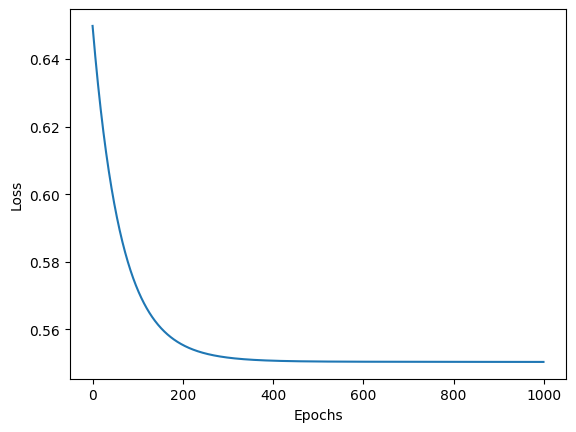

Training Losses are 
          0
0  0.634172
1  0.633023
2  0.631891
3  0.630775
4  0.629676
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


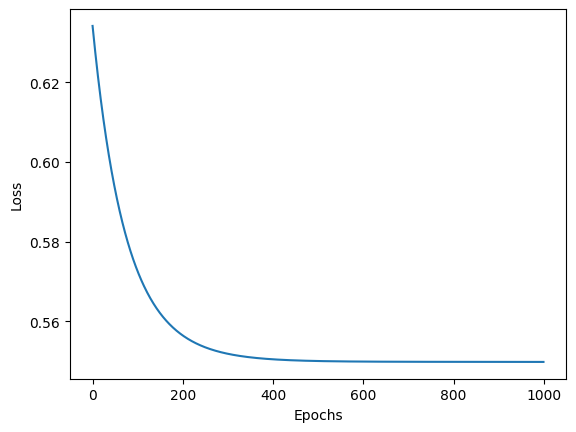

Training Losses are 
          0
0  0.701642
1  0.697949
2  0.694350
3  0.690842
4  0.687424
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


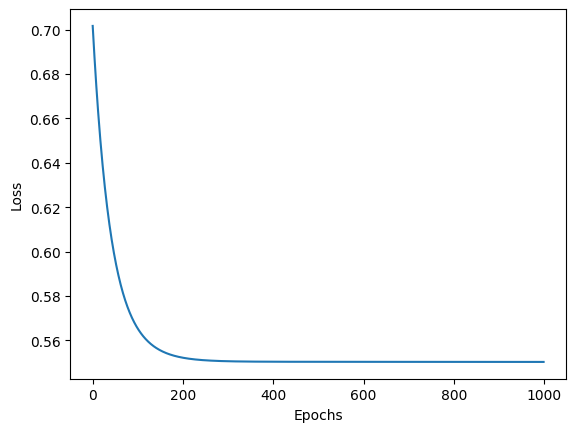

Training Losses are 
          0
0  0.739651
1  0.734932
2  0.730333
3  0.725853
4  0.721489
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


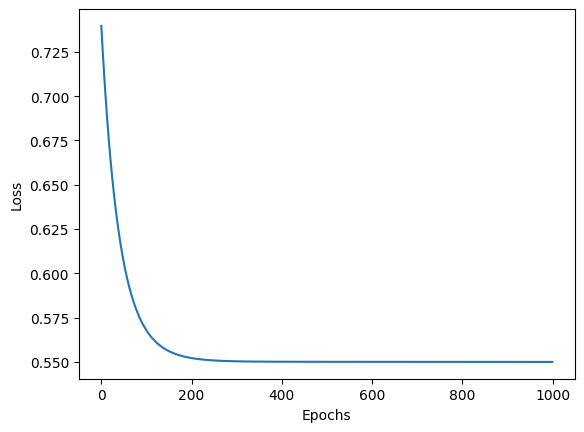

Training Losses are 
          0
0  0.908102
1  0.898655
2  0.889454
3  0.880495
4  0.871772
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


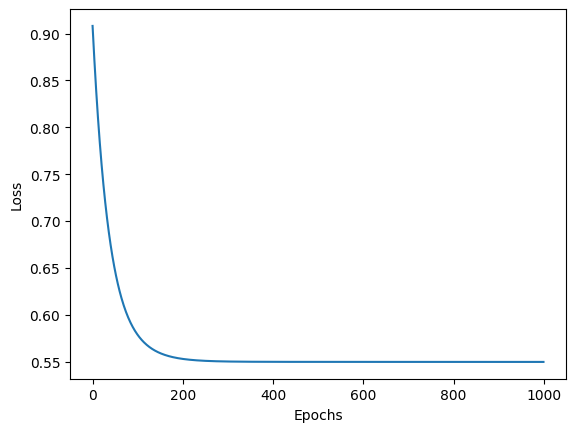

Training Losses are 
          0
0  0.583833
1  0.582949
2  0.582089
3  0.581252
4  0.580439
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


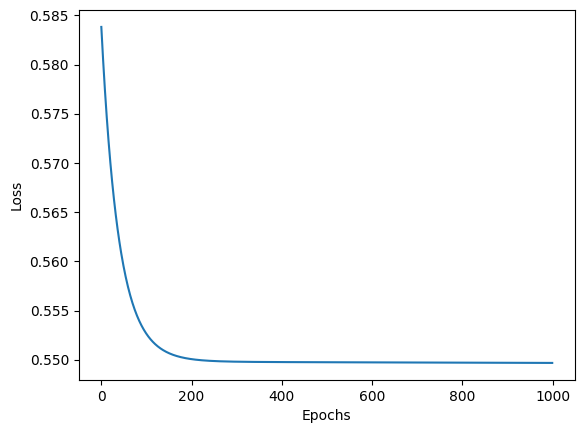

Training Losses are 
          0
0  0.682632
1  0.676808
2  0.671253
3  0.665954
4  0.660900
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


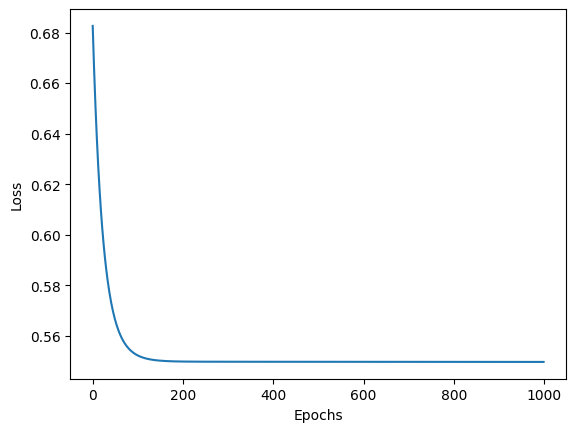

Training Losses are 
          0
0  0.622698
1  0.619474
2  0.616403
3  0.613476
4  0.610686
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


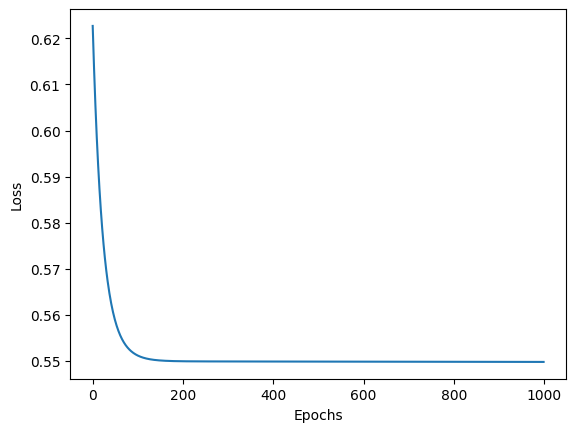

Training Losses are 
          0
0  0.677256
1  0.671920
2  0.666821
3  0.661948
4  0.657290
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


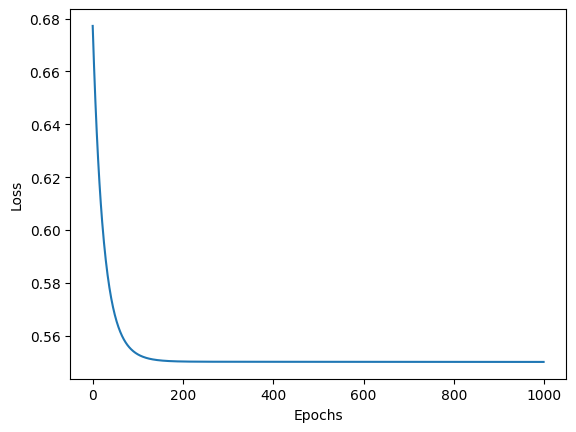

Training Losses are 
          0
0  0.858928
1  0.844609
2  0.830943
3  0.817903
4  0.805465
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


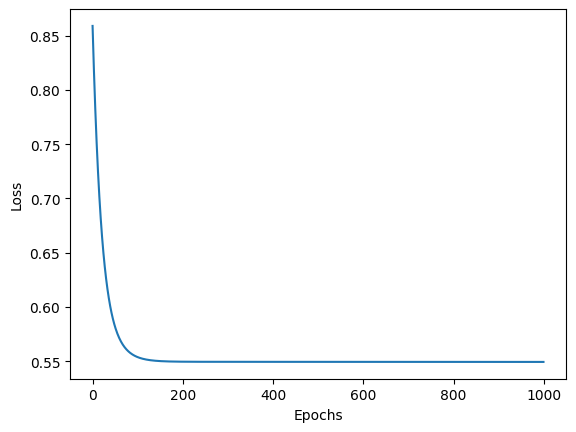

Training Losses are 
          0
0  0.680098
1  0.669408
2  0.659646
3  0.650728
4  0.642580
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


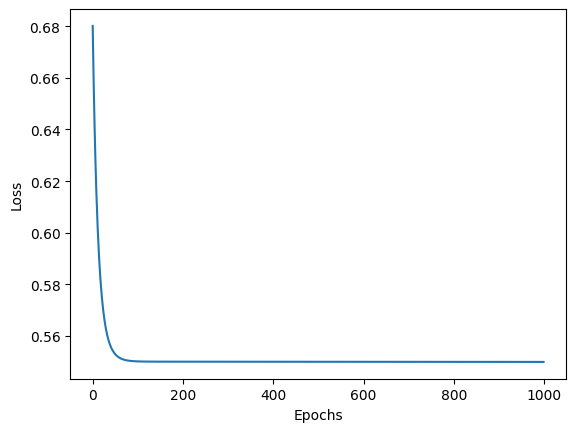

Training Losses are 
          0
0  0.853149
1  0.828198
2  0.805274
3  0.784235
4  0.764945
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


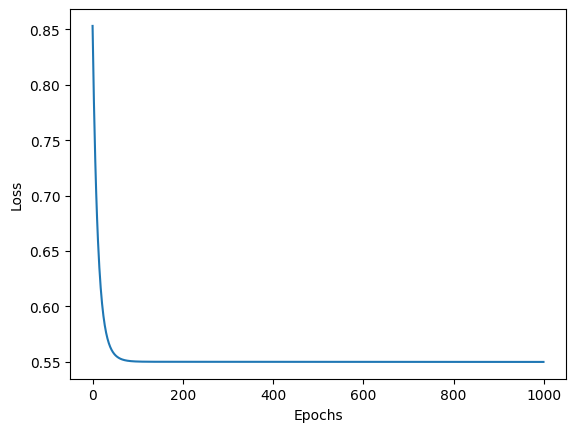

Training Losses are 
          0
0  0.664290
1  0.655387
2  0.647217
3  0.639717
4  0.632831
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


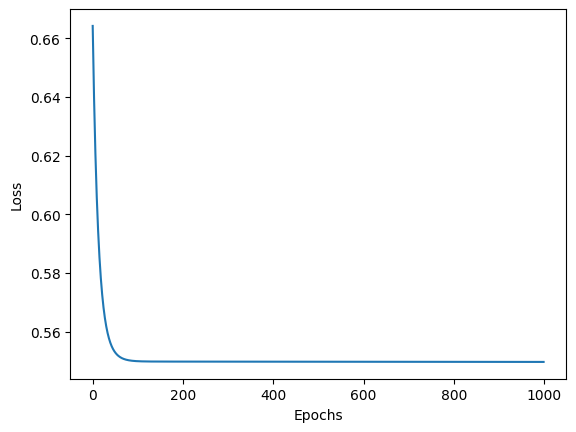

Training Losses are 
          0
0  0.796589
1  0.775181
2  0.755652
3  0.737851
4  0.721633
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


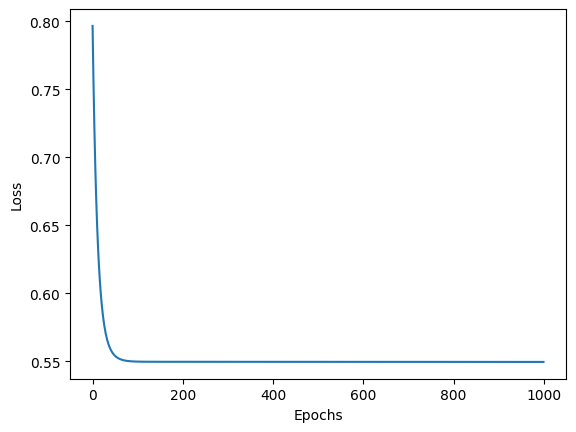

Training Losses are 
          0
0  0.654840
1  0.653237
2  0.651659
3  0.650105
4  0.648575
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


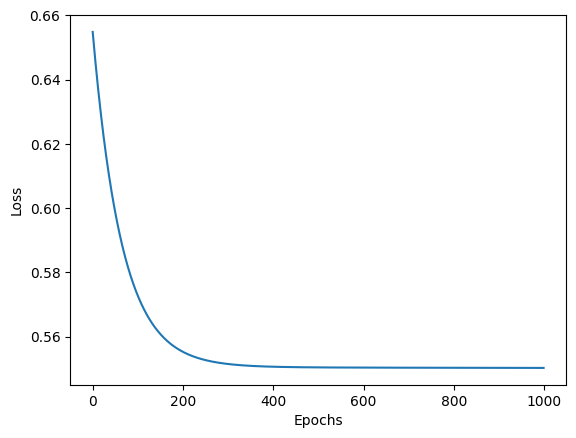

Training Losses are 
          0
0  0.618563
1  0.617495
2  0.616445
3  0.615411
4  0.614394
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


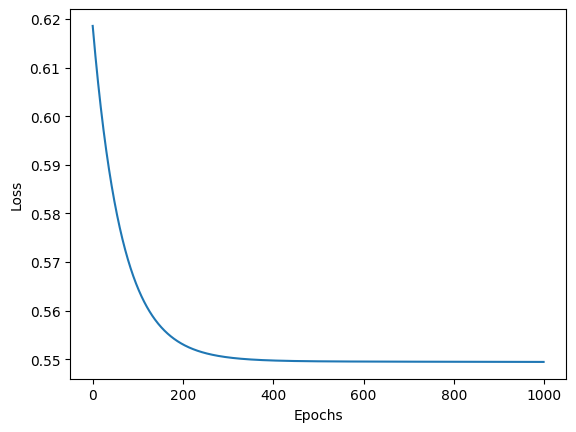

Training Losses are 
          0
0  1.050126
1  1.041607
2  1.033248
3  1.025048
4  1.017002
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


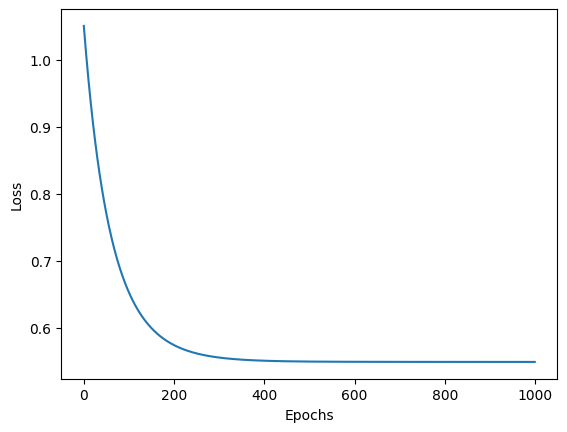

Training Losses are 
          0
0  0.655485
1  0.653902
2  0.652346
3  0.650814
4  0.649307
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


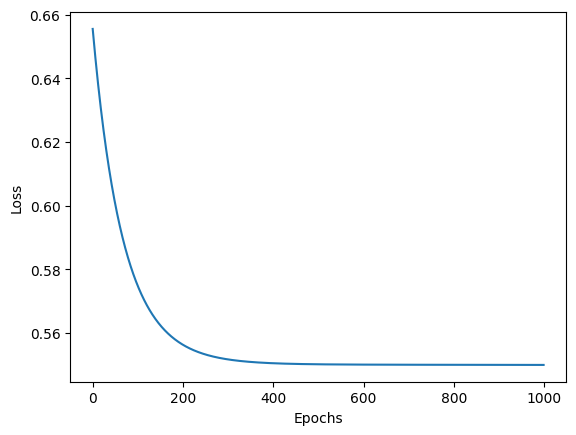

Training Losses are 
          0
0  0.768037
1  0.762179
2  0.756483
3  0.750944
4  0.745557
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


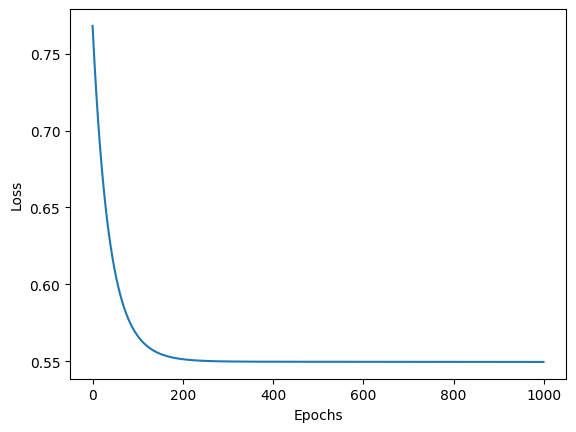

Training Losses are 
          0
0  0.565721
1  0.565351
2  0.564989
3  0.564637
4  0.564294
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


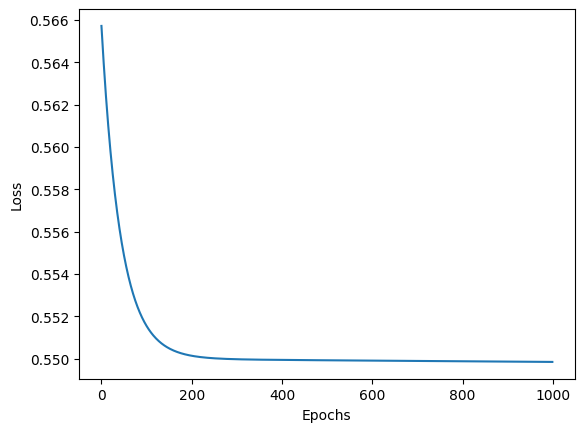

Training Losses are 
          0
0  0.823035
1  0.815665
2  0.808501
3  0.801538
4  0.794770
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


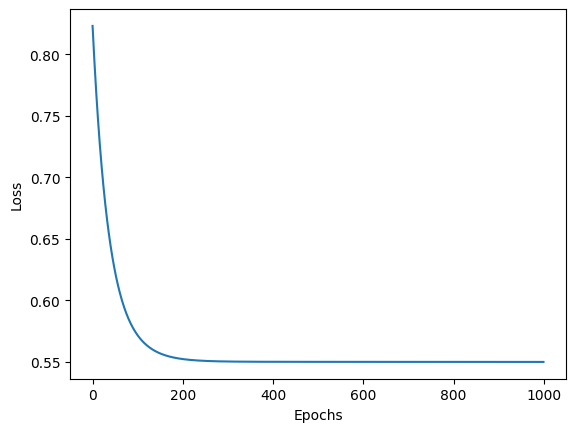

Training Losses are 
          0
0  0.657685
1  0.654691
2  0.651783
3  0.648960
4  0.646218
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


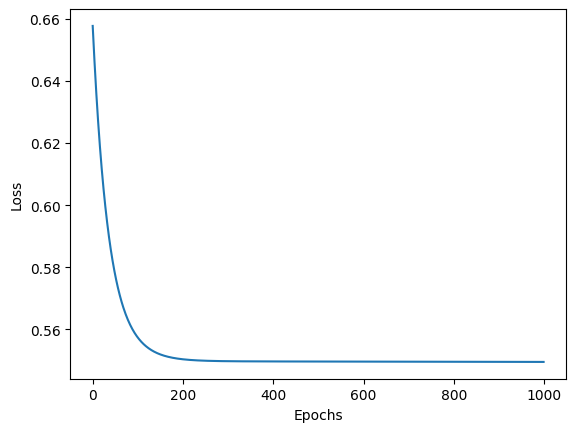

Training Losses are 
          0
0  0.616474
1  0.613742
2  0.611129
3  0.608630
4  0.606239
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


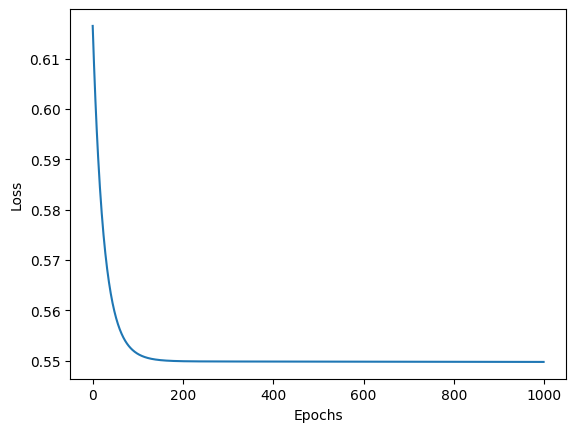

Training Losses are 
          0
0  0.659335
1  0.654887
2  0.650630
3  0.646555
4  0.642655
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


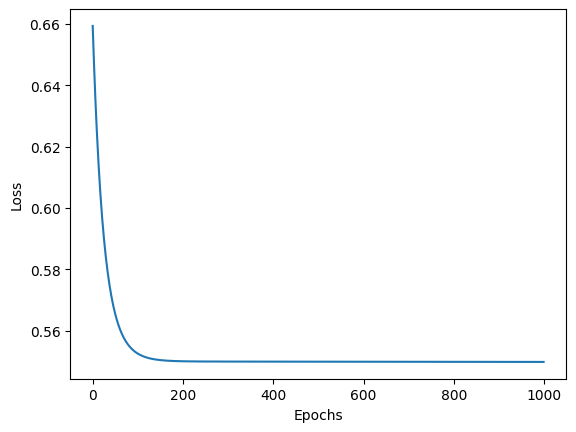

Training Losses are 
          0
0  0.848702
1  0.834624
2  0.821206
3  0.808420
4  0.796239
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


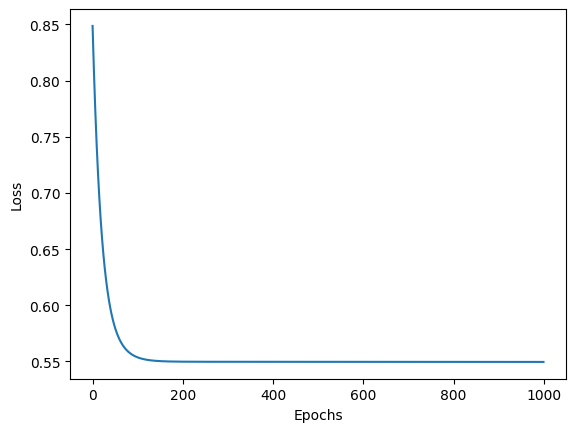

Training Losses are 
          0
0  0.807893
1  0.796044
2  0.784745
3  0.773971
4  0.763702
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


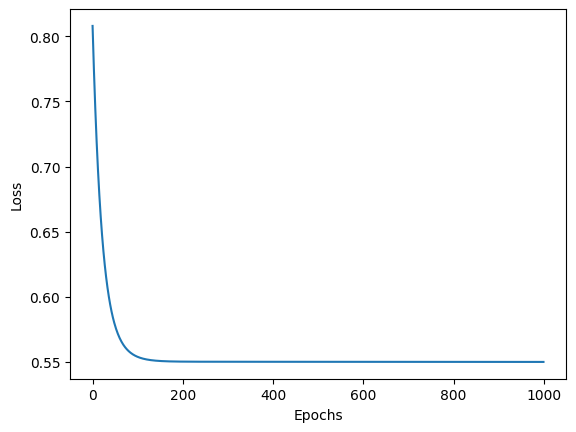

Training Losses are 
          0
0  0.664578
1  0.655075
2  0.646403
3  0.638485
4  0.631254
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


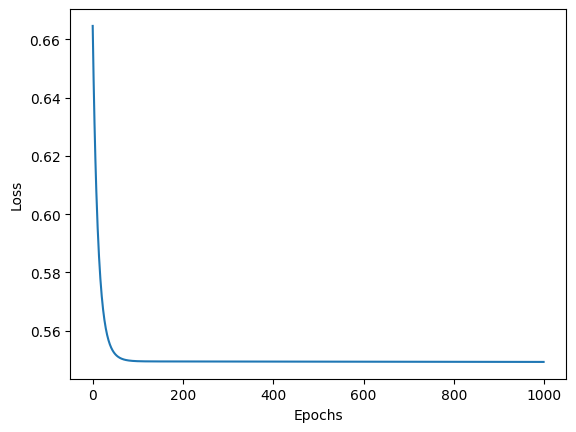

Training Losses are 
          0
0  0.739999
1  0.724124
2  0.709619
3  0.696369
4  0.684266
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


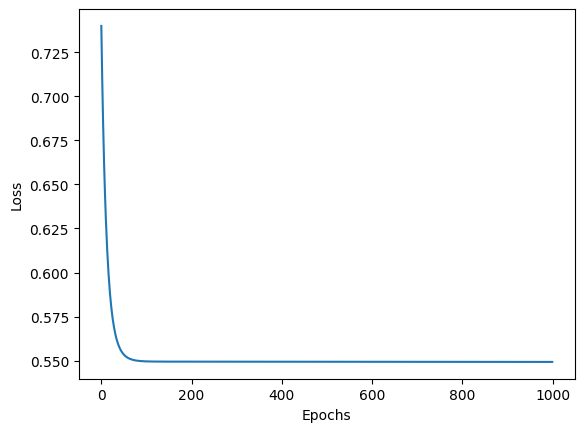

Training Losses are 
          0
0  0.665466
1  0.656437
2  0.648152
3  0.640549
4  0.633567
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


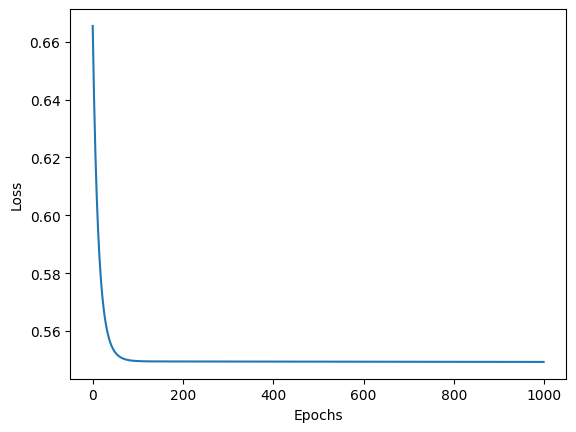

Training Losses are 
          0
0  0.791197
1  0.770527
2  0.751656
3  0.734440
4  0.718741
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


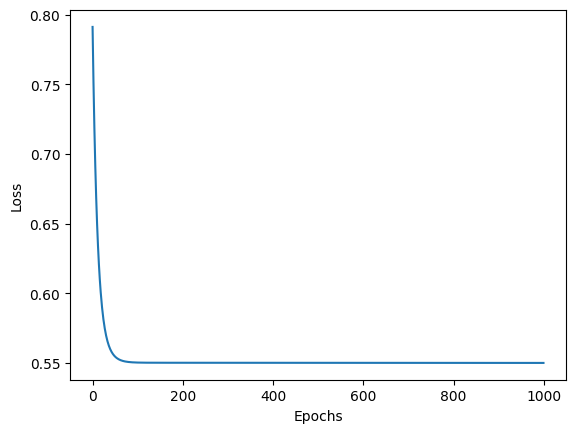

In [20]:
nuerons = [8,16,32,64]
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(16,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.SGD(model.parameters(), lr=0.01)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()